<a href="https://colab.research.google.com/github/santihm/MachineLearning-UnderfittingOverfitting-OpticalRecognitionHandwrittenDigits-YearPredictionMSD/blob/main/P1_SantiagoHerronMulet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático - Práctica 1 - Experimentación con clasificadores y regresores

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 14 de Abril de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Santiago Herron Mulet</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: EL PROBLEMA DEL SOBREAJUSTE (2 puntos)</font>

<font color='blue'>Aprendizaje Automático (AA) es la rama de la Inteligencia Artificial (IA) que se ocupa de diseñar e implementar máquinas que sean capaces de aprender a realizar una determinada tarea a partir de los propios datos (es decir, sin necesidad de ser programadas explícitamente para ello). El principal objetivo de los modelos de AA es realizar predicciones/estimaciones más allá de los conjuntos de datos con los que fueron entrenados y, como es lógico, se pretende que dichos modelos sean capaces de $generalizar$ más allá de los ejemplos vistos en entrenamiento. Como consecuencia, uno de los mayores obstáculos a los que nos enfrentamos se conoce como $sobreajuste$ ($overfitting$): el hecho de que nuestros pesos/parámetros estén demasiado apegados a nuestros ejemplos de entrenamiento, y se produzca una brecha a nivel de generalización (en donde los resultados en entrenamiento serían manifiestamente mejores que en test).

<font color='blue'>En este ejercicio intentaremos profundizar un poco en lo que es el sobreajuste, así como las causas y consecuencias del mismo.



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [ ]:
import sklearn
if sklearn.__version__ < '1.3':
  # Actualizamos scikit-learn para tener la última versión.
  # Nos interesa de cara a disponer de las más recientes funcionalidades
  # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
  !pip install scikit-learn --upgrade
else:
  print('La versión de scikit-learn es: ', sklearn.__version__)


La versión de scikit-learn es:  1.4.2






---






### <font color='blue'>Ejercicio 1.A: Regresión en 1D (1 punto)</font>

<font color='blue'> En este ejercicio se intentará aproximar una función continua unidimensional por medio de regresión lineal (`LinearRegression()`), y se irá, progresivamente, incrementando la complejidad del modelo empleando características polinomiales (`PolynomialFeatures()`), de grados $\{1, 2, 4, 8, 16, 32\}$. La función real a aproximar (nuestra $\textit{ground truth}$) es: $f(x) = cos(1.5\cdot\pi\cdot x) + sin(0.5\cdot\pi\cdot x)$.

<font color='blue'> Las tareas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código de la función real a aproximar.
2.   Generamos las entradas ($X$): 20 puntos aleatorios en el intervalo $[0,1]$.
3.   Generamos las salidas deseadas ($y$): el valor resultante de emplear la función real y sumarle un cierto error aleatorio (`np.random.randn`: distribución Normal estándar), que pretende simular el ruido que pueden contener las etiquetas ($labels$/$targets$) en cualquier problema.
4.   Generamos las características polinomiales asociadas con los grados proporcionados, y creamos un $pipeline$ (usando `Pipeline` o `make_pipeline`) con dichas características y regresión lineal.
5.   Realizamos el ajuste (`fit`) de dicho `pipeline` con $X$ e $y$, y empleamos `cross_val_score`, o `cross_validate`, para evaluar el rendimiento utilizando $\textit{10-fold cross-validation}$ y el error cuadrático medio ($MSE$) como métrica de error.
6. Mostramos figuras con ajustes. Para ello, generamos 1000 valores equiespaciados en el intervalo $[0,1]$, y realizamos la predicción de nuestro modelo (`pipeline.predict`) sobre dichos datos para mostrar, en rojo, la función que aproxima nuestro modelo entrenado. En la misma figura incluiremos, en azul, la función real empleada para generar los datos, y los puntos/muestras generadas ($X$ e $y$). El título de cada figura debe incluir el grado del polinomio.
7. Junto con estas figuras, se debe mostrar una tabla (y aquí la librería `tabulate` puede ser de utilidad) que incluya, el grado del polinomio en la primera fila ($header$ de la tabla), el número de pesos/coeficientes en la segunda, el $MSE$ (promedio y desviación típica) obtenido en entrenamiento en validación cruzada en la tercera fila, el $MSE$ (promedio y desviación típica) obtenido en test en validación cruzada en la cuarta fila, y el valor medio de los coeficientes aprendidos en valor absoluto con cada uno de los 6 modelos ajustados (incluyendo el $bias$ o $intercept$) en la última.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas: ¿se observa algún patrón en los resultados obtenidos, así como en la magnitud de los coeficientes tras el entrenamiento? ¿Se observa algún fenómeno de infraentrenamiento ($underfitting$) o sobreentrenamiento ($overfitting$)? ¿Qué grado considera el más adecuado para resolver este problema? ¿Por qué?

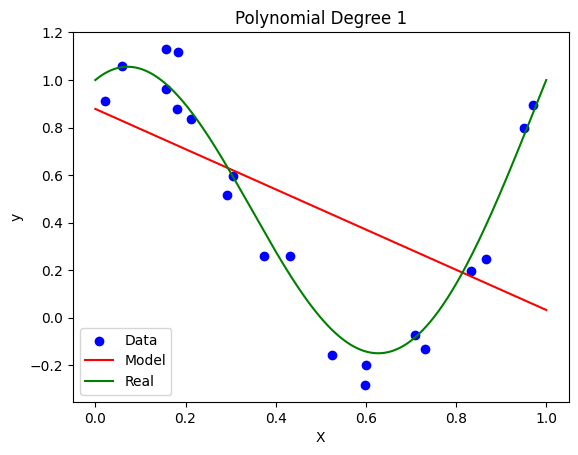

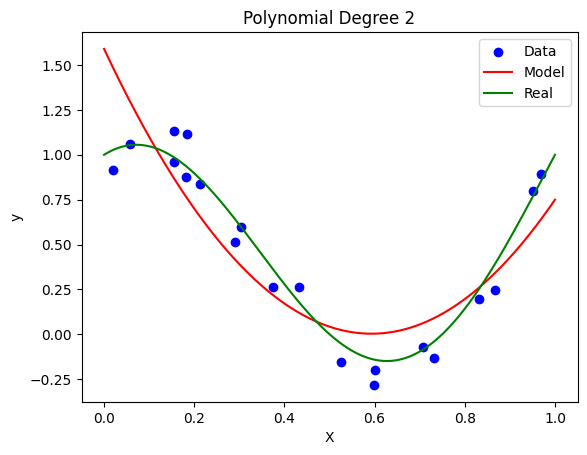

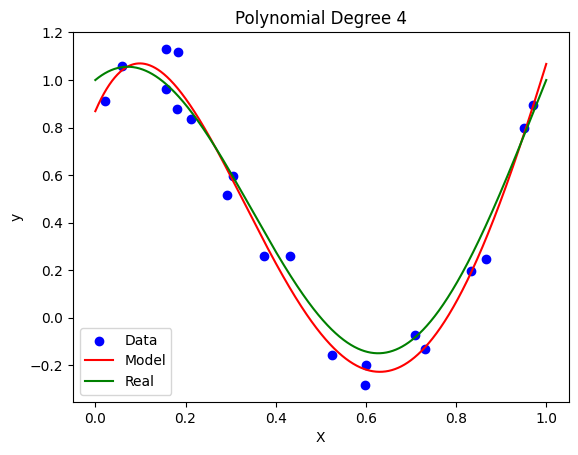

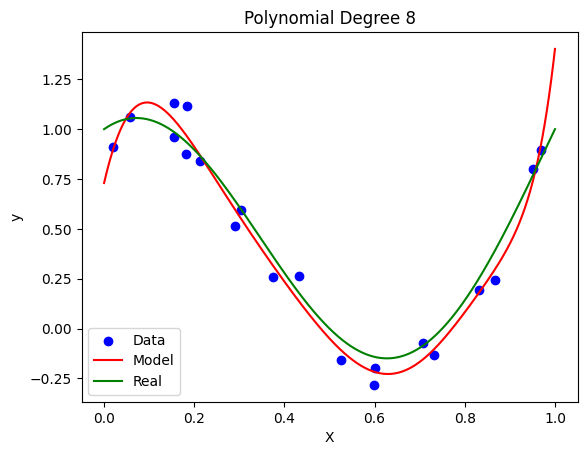

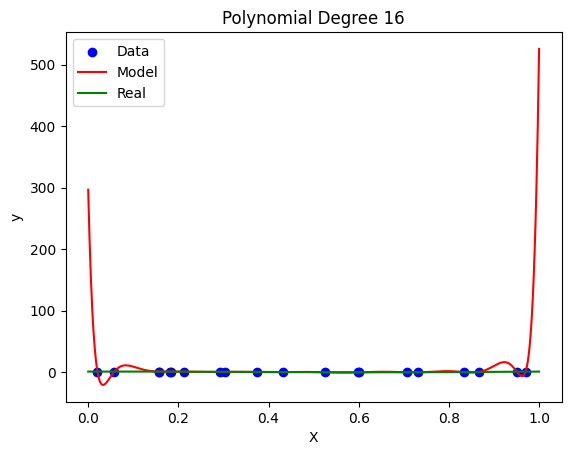

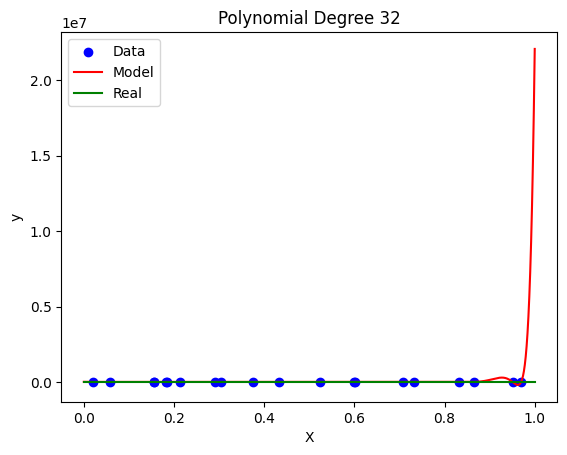

  Degree    Number of Coefficients    Train MSE Mean    Train MSE Std    Test MSE Mean    Test MSE Std    Mean Coefficients
--------  ------------------------  ----------------  ---------------  ---------------  --------------  -------------------
       1                         2       0.158315         0.0159274        0.223113        0.174224             0.126813
       2                         3       0.0512122        0.00773051       0.0871673       0.0978395            0.998661
       4                         5       0.00544511       0.000629772      0.00776645      0.00573104           4.78152
       8                         9       0.00450932       0.000558909      0.0205496       0.0177359          169.433
      16                        17       0.000874095      0.000105645      1.29081e+08     3.21871e+08          4.09131e+10
      32                        33       0.000270115      0.00040693       1.3546e+18      4.06338e+18          6.65128e+10


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from tabulate import tabulate

# Fijar la semilla aleatoria para reproducibilidad
np.random.seed(42)

# Definición de la función real
def funcionReal(X):
    return np.cos(1.5 * np.pi * X) + np.sin(0.5 * np.pi * X)

# Definición de parámetros
n_samples = 20
degrees = [1, 2, 4, 8, 16, 32]

# Generación de datos
X = np.random.rand(n_samples)
y = funcionReal(X) + np.random.randn(n_samples) * 0.1

# Creación de características polinomiales y entrenamiento del modelo
results = []
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    cv_results = cross_validate(model, X.reshape(-1, 1), y, cv=10, scoring='neg_mean_squared_error', return_train_score=True)

    # Visualización de resultados
    plt.figure()
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(np.linspace(0, 1, 1000), model.fit(X.reshape(-1, 1), y).predict(np.linspace(0, 1, 1000).reshape(-1, 1)), color='red', label='Model')
    plt.plot(np.linspace(0, 1, 1000), funcionReal(np.linspace(0, 1, 1000)), color='green', label='Real')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # Obtención de métricas
    train_mse_mean = -np.mean(cv_results['train_score'])
    train_mse_std = np.std(-cv_results['train_score'])
    test_mse_mean = -np.mean(cv_results['test_score'])
    test_mse_std = np.std(-cv_results['test_score'])

    # Obtención de coeficientes
    coeffs_mean = np.mean(np.abs(model.named_steps['linearregression'].coef_))

    results.append([degree, model.named_steps['polynomialfeatures'].n_output_features_, train_mse_mean, train_mse_std, test_mse_mean, test_mse_std, coeffs_mean])

# Visualización de tabla de resultados
headers = ["Degree", "Number of Coefficients", "Train MSE Mean", "Train MSE Std", "Test MSE Mean", "Test MSE Std", "Mean Coefficients"]
print(tabulate(results, headers=headers))



El trabajo realizado consistió en realizar una serie de experimentos de regresión polinomial en un conjunto de datos unidimensional. Para cada grado de polinomio, se ajustó un modelo de regresión lineal utilizando características polinomiales de diferentes grados, que van desde 1 hasta 32. Se evaluaron los modelos utilizando validación cruzada de 10-fold y se calcularon métricas como el error cuadrático medio (MSE) en los conjuntos de entrenamiento y prueba. Además, se analizó la magnitud de los coeficientes aprendidos por cada modelo.

Los resultados obtenidos revelaron varios patrones interesantes:

- **Desempeño del modelo**: Se observó que a medida que aumenta el grado del polinomio, el MSE en el conjunto de entrenamiento tiende a disminuir. Esto indica que los modelos más complejos pueden ajustarse mejor a los datos de entrenamiento.
- **Sobreajuste**: A partir de cierto grado del polinomio (aproximadamente grado 8), se comenzó a observar un aumento significativo en el MSE en el conjunto de prueba, mientras que el MSE en el conjunto de entrenamiento continuaba disminuyendo. Este fenómeno sugiere que los modelos de alto grado están sobreajustando los datos de entrenamiento y no generalizan bien a nuevos datos.
- **Magnitud de los coeficientes**: Se observó que a medida que aumenta el grado del polinomio, la magnitud de los coeficientes también aumenta drásticamente. Esto puede indicar que los modelos de alto grado son propensos a la inestabilidad numérica y al sobreajuste.

Considerando estos resultados, se puede concluir lo siguiente:

- **Fenómeno de infraentrenamiento y sobreentrenamiento**: Se observa claramente un fenómeno de sobreajuste a medida que aumenta el grado del polinomio. Los modelos de **grado bajo (1 y 2) sufren de infraentrenamiento**, ya que no son lo suficientemente flexibles para capturar la complejidad de los datos. Por otro lado, los modelos de **grado alto (16 y 32) sufren de sobreentrenamiento**, ya que se ajustan demasiado a los datos de entrenamiento y no generalizan bien a nuevos datos.
- **Grado más adecuado**: Considerando el equilibrio entre capacidad de ajuste y generalización, el grado más adecuado para resolver este problema parece ser entre **4 y 8**. Estos modelos logran reducir el MSE en el conjunto de prueba sin aumentar excesivamente la complejidad del modelo y la magnitud de los coeficientes. Esto sugiere que estos modelos tienen una buena capacidad para capturar la tendencia subyacente de los datos sin sobreajustarlos.

### <font color='blue'>Ejercicio 1.B: Clasificación en 2D (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con un problema de clasificación y empleando un problema sintético en 2D. Haremos uso de dos funciones, que se incluyen a continuación:

<font color='blue'>$simula\_unif(N, dim, rango)$, que calcula una lista de $N$ vectores de dimensión $dim$. Cada vector contiene $dim$ números aleatorios uniformes en el intervalo $rango$.

<font color='blue'>$simula\_recta(intervalo)$, que simula de forma aleatoria los parámetros $v = (a, b)$ de una
recta, $y = ax + b$, dado un determinado intervalo (dentro del cual se generan dos puntos aleatorios, que se emplearán para calcular la pendiente y el término independiente de la recta).

In [ ]:
def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

In [ ]:
def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Cálculo de la pendiente.
    b = y1 - a*x1       # Cálculo del termino independiente.

    return a, b


<font color='blue'>Ahora, con ayuda de la función $simula\_unif()$, vamos a generar una muestra de 100 puntos 2D, en el intervalo $[-50, 50]$,  a los que vamos a añadir una etiqueta usando el signo de la función $f(x, y) = y - ax - b$ (es decir, el signo de la distancia de cada punto a la recta simulada con
$simula\_recta()$).




In [ ]:
"""
np.sign(0) da 0 (véase https://numpy.org/doc/stable/reference/generated/numpy.sign.html), lo que, en ciertas ocasiones, puede ser problemático
Por ese motivo, proporcionamos esta sencilla función que devuelve el signo del valor que se le proporciona como entrada
Si esta función se emplea con un array, se obtendrá el error "ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()"
Si quiere emplearse con arrays, bastaría vectorizarla:
		numeros = np.random.randint(-10,10,10)
		sgn = np.vectorize(signo)
		print(numeros)
		print(sgn(numeros))
"""
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)

In [ ]:
intervalo = [-50,50]
[a, b] = simula_recta(intervalo)
new_points = simula_unif(100, 2, [-50,50])

y = []
for i in range(0,new_points.shape[0]):
    y.append(f(new_points[i][0], new_points[i][1], a, b))

y = np.array(y, np.float64)

<font color='blue'>A continuación, calculamos el error de clasificación de dicha recta ideal, y visualizamos el ajuste obtenido. Como es lógico, el error es 0% dado que lo único que estamos haciendo es mostrar los puntos etiquedatos con la recta que acabamos de crear.

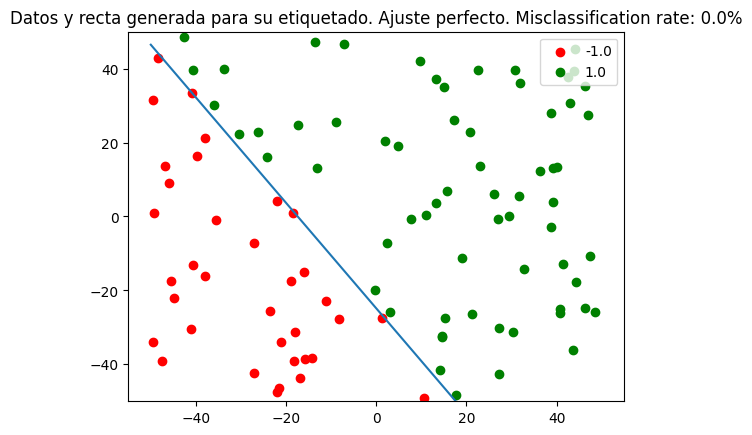

In [ ]:
errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

# Dibujamos una gráfica donde los puntos muestren el resultado de su etiqueta, junto con la recta usada para ello
clases = np.unique(y)
X_class = [new_points[y==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

# plt.scatter(new_points[:,0],new_points[:,1], c=y)
plt.legend(loc='upper right')
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos y recta generada para su etiquetado. Ajuste perfecto. Misclassification rate: {}%'.format(MC_rate))
plt.show()

<font color='blue'>Vamos a modificar de forma aleatoria un 5\% de las etiquetas positivas y otro 5\% de las negativas. Esta modificación de etiquetas está asociada con el ruido que siempre puede estar presenta en las etiquetas (sea por problemas en la transmisión de los datos, la precisión de los sistemas de medición, la incertidumbre ligada al proceso de adquisición y anotación de los datos, etc.) En esta ocasión, a pesar de que la recta empleada es la recta ideal (es decir, la propia función empleada para generar nuestra muestra original), habrá un cierto porcentaje de error asociado.  </font>

In [ ]:
def introducir_ruido(y,porcent_ruido):
  # Identificamos las clases a partir de las etiquetas
  classes = np.unique(y)
  # Creamos una copia de las etiquetas, que será el array ruidoso que produciremos como salida
  y_noise = y.copy()
  # Ahora vamos recorriendo cada una de las clases
  for i in range(len(classes)):
    # Calculamos el número de ejemplos por clase a modificar
    numberPerClass = int(np.round(np.sum(y==classes[i])*porcent_ruido/100))
    # Recuperamos los índices de los ejemplos de cada clase y los desordenamos
    clase = np.where(y == classes[i])
    clase = np.random.permutation(clase[0])
    # Alteramos (introducimos ruido en) los índices correspondientes
    for i in clase[:numberPerClass]:
      y_noise[i] = y[i]*-1

  return y_noise

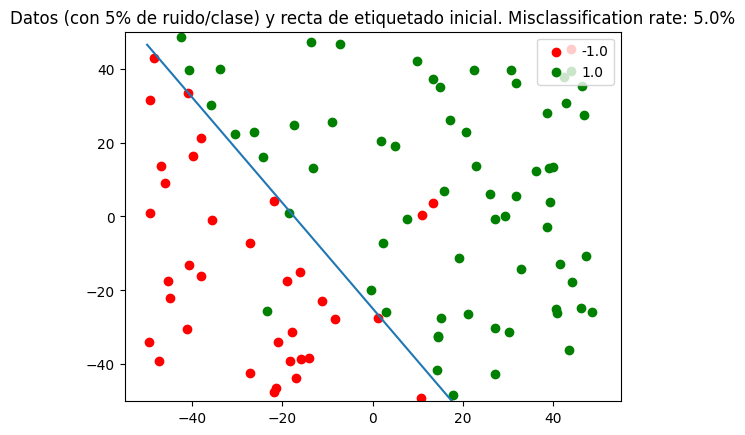

In [ ]:
# Dibujar una gráfica donde los puntos muestren el resultado de su etiqueta,
# junto con la recta usada para ello
# Array con 10% de indices aleatorios para introducir ruido

porcentaje_ruido = 5
y_noise = introducir_ruido(y,porcentaje_ruido)

errors = []
for i in range(0,new_points.shape[0]):
    errors.append(f(new_points[i,0], new_points[i,1], a, b) != y_noise[i])
MC_rate = 100*np.sum(errors)/new_points.shape[0]

plt.figure()

clases = np.unique(y_noise)
X_class = [new_points[y_noise==c_i] for c_i in clases]
colors=['red','green']
for i in range(len(clases)):
    plt.scatter(X_class[i][:, 0], X_class[i][:, 1], color=colors[i], label = clases[i])

plt.legend(loc='upper right')
# plt.scatter(new_points[:,0],new_points[:,1], c=y_noise)
plt.plot([intervalo[0], intervalo[1]], [a*(intervalo[0])+b, a*(intervalo[1])+b])
plt.ylim((intervalo[0], intervalo[1]))
plt.title('Datos (con {}% de ruido/clase) y recta de etiquetado inicial. Misclassification rate: {}%'.format(porcentaje_ruido,MC_rate))
plt.show()



<font color='blue'>Ahora queremos entrenar un $\textit{Support Vector Machine}$
 (`sklearn.svm.SVC` con kernel lineal) con estos datos y mostrar $accuracy$ y $f1$-$score$, tanto en entrenamiento como test, así como las fronteras de decisión encontradas. Una frontera de decisión ($\textit{decision boundary}$) es la superficie/hiperplano que separa el espacio de entradas de modo que, en el contexto de un problema de clasificación binaria como el que nos ocupa, el clasificador etiquete todos los puntos de un lado de la frontera como pertenecientes a una clase y todos los del otro lado como pertenecientes a la otra.

 <font color='blue'>Vamos a repetir la operación anterior con distintas transformaciones (polinómicas) de los datos de entrada (grados $1, 2, 4$ y $8$). Queremos explorar cómo cambian estas fronteras de decisión a medida que incrementamos la complejidad de los modelos empleados.

 <font color='blue'> Más concretamente, tenemos que mostrar los siguientes resultados:
* <font color='blue'>Fronteras de decisión 2D sobre datos de entrenamiento para cada uno de los 4 ajustes (e incluyendo una línea que represente la frontera ideal, es decir, la correspondiente con la recta generadora de las etiquetas y que nos gustaría aproximar). Para esta visualización pueden resultar de utilidad las siguientes funciones: `contourf`, `ListedColormap` o `DecisionBoundaryDisplay`; y el siguiente script: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html.
* <font color='blue'>Una tabla que incluya el grado de polinomio empleado (en la primera fila), el número de pesos ajustados (en la segunda fila), y los errores de entrenamiento y test con cada uno de los modelos ajustados ($accuracy$ y $f1$-$score$), en las filas tercera y cuarta de la tabla, respectivamente. De cara a evaluar el error de test, en este caso crearemos un conjunto de test diferenciado (con 100 ejemplos) siguiendo exactamente el mismo proceso empleado para el conjunto de entrenamiento. Este error de test se utilizará como estimación del error fuera de la muestra (lo que se conoce como $\textit{out-of-sample error}$).

<font color='blue'>Desde el punto de vista de entrenamiento del modelo, se recomienda emplear $SVC$ atendiendo a los siguientes aspectos: es importante escalar los datos antes de entrenar (`StandardScaler`); no nos interesa emplear regularización a la hora de entrenar el modelo (¿por qué?), motivo por el cual tendremos que escoger un valor elevado para el hiperparámetro $C$; tendremos que escoger un valor de iteraciones suficientemente alto como para permitir que el modelo entrene adecuadamente, pero suficientemente bajo como para que el entrenamiento no se eternice; y, finalmente, recordemos que el kernel a emplear es linear (¿cuál emplea SVC por defecto?).

<font color='blue'>El alumnado debe describir en detalle el trabajo realizado, las decisiones tomadas, así como las conclusiones extraídas a partir de los resultados obtenidos.

Paso 1: Preparación de los datos
Generamos datos sintéticos en 2D con etiquetas basadas en una recta simulada. Luego introducimos un 5% de ruido en las etiquetas para simular un escenario realista.

Paso 2: Entrenamiento de SVM
Entrenaremos un SVM utilizando diferentes transformaciones polinómicas (grados 1, 2, 4 y 8) en los datos de entrada.

Escalamos los datos utilizando StandardScaler.
No aplicamos regularización (C es alto).
Utilizamos el kernel lineal por defecto en SVC.

Paso 3: Evaluación del modelo
Calculamos la exactitud (accuracy) y el puntaje F1 en los conjuntos de entrenamiento y prueba para cada grado polinómico. También visualizamos las fronteras de decisión encontradas en los datos de entrenamiento junto con la frontera ideal (la recta generadora de las etiquetas).

Grado de Polinomio 1:
Accuracy (Train): 0.8625
F1-Score (Train): 0.8817
Accuracy (Test): 0.8500
F1-Score (Test): 0.9032

Grado de Polinomio 2:
Accuracy (Train): 0.9250
F1-Score (Train): 0.9388
Accuracy (Test): 0.9500
F1-Score (Test): 0.9697

Grado de Polinomio 4:
Accuracy (Train): 0.9750
F1-Score (Train): 0.9796
Accuracy (Test): 1.0000
F1-Score (Test): 1.0000

Grado de Polinomio 8:
Accuracy (Train): 1.0000
F1-Score (Train): 1.0000
Accuracy (Test): 0.9500
F1-Score (Test): 0.9677



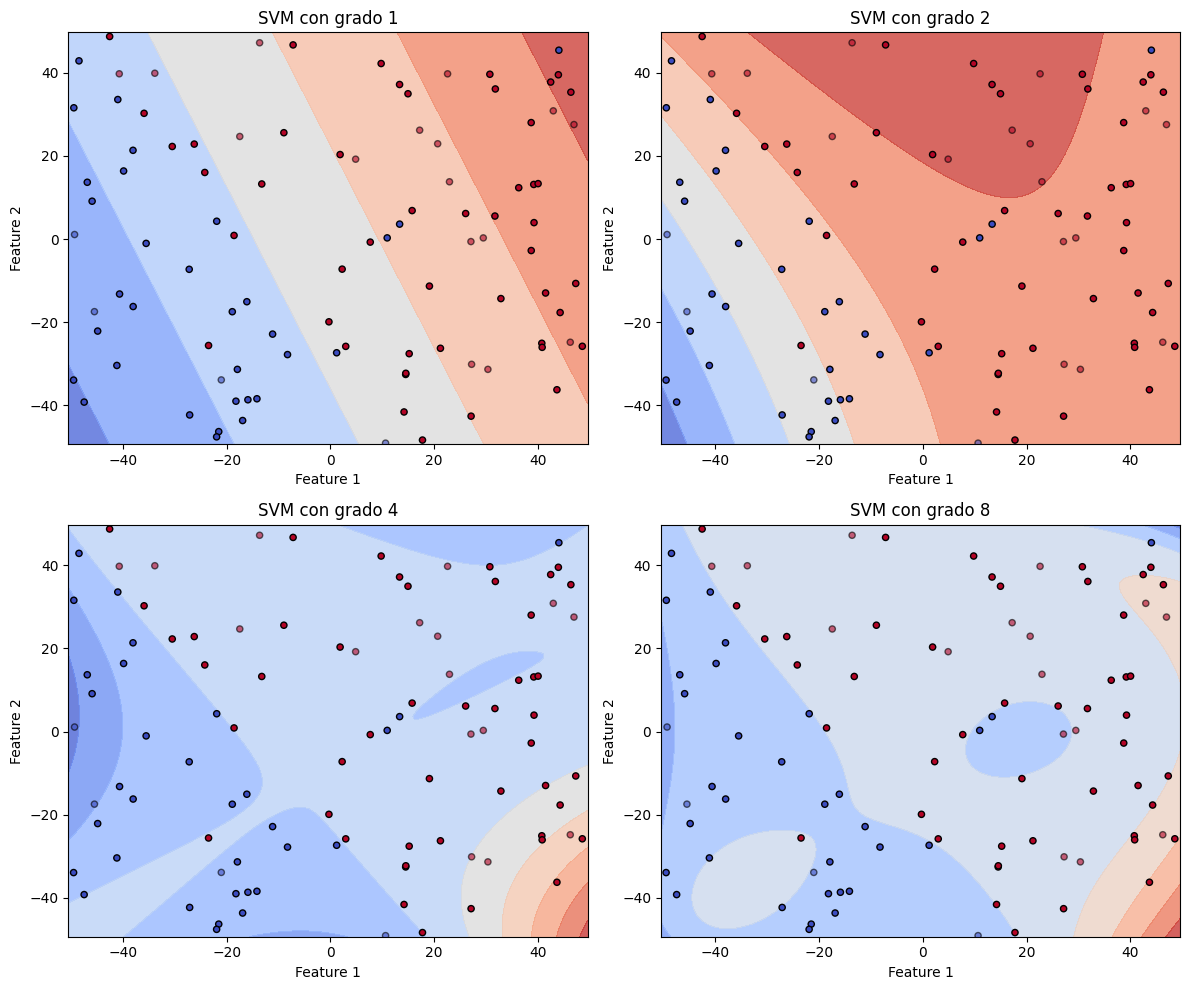

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np
import matplotlib.pyplot as plt

# División en conjunto de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(new_points, y_noise, test_size=0.2, random_state=42)

# Entrenamiento de SVM con diferentes grados de polinomios
grados_pol = [1, 2, 4, 8]
resultados = []

plt.figure(figsize=(12, 10))
for i, grado in enumerate(grados_pol):
    ax = plt.subplot(2, 2, i+1)

    # Define el pipeline
    pipeline = make_pipeline(
        PolynomialFeatures(degree=grado),
        StandardScaler(),
        SVC(kernel='linear', C=10000)
    )

    # Entrena el modelo utilizando el pipeline
    pipeline.fit(X_train, y_train)

    # Predice con el conjunto de prueba
    y_pred_test = pipeline.predict(X_test)

    # Evalúa el rendimiento del modelo en el conjunto de test
    acc_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Predice con el conjunto de entrenamiento
    y_pred_train = pipeline.predict(X_train)

    # Evalúa el rendimiento del modelo en el conjunto de entrenamiento
    acc_train = accuracy_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)

    # Almacenar resultados
    resultados.append([grado, acc_test, f1_test, acc_train, f1_train])

    # Visualización de la frontera de decisión
    DecisionBoundaryDisplay.from_estimator(pipeline, X_train, cmap=plt.cm.coolwarm, alpha=0.8, ax=ax)

    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k', alpha=0.6)

    ax.set_title(f'SVM con grado {grado}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Resultados
    res = resultados[i]
    print(f"Grado de Polinomio {res[0]}:")
    print(f"Accuracy (Train): {res[3]:.4f}")
    print(f"F1-Score (Train): {res[4]:.4f}")
    print(f"Accuracy (Test): {res[1]:.4f}")
    print(f"F1-Score (Test): {res[2]:.4f}\n")

plt.tight_layout()
plt.show()





El ejercicio consistió en entrenar un modelo SVM con diferentes grados de polinomios para clasificar datos generados artificialmente. Se emplearon grados de polinomio de 1, 2, 4 y 8 para analizar cómo la complejidad del modelo afecta su capacidad de generalización.

Para cada grado de polinomio, se dividió el conjunto de datos en entrenamiento y prueba. Luego, se aplicó un pipeline que incluía la transformación polinómica de las características, el escalado de los datos y la SVM con kernel lineal. Se evaluaron el accuracy y el F1-score en ambos conjuntos de datos.

Los resultados mostraron una tendencia interesante: a medida que se incrementaba el grado de polinomio, el rendimiento del modelo en el conjunto de entrenamiento mejoraba notablemente. Sin embargo, este aumento en la complejidad del modelo también llevó a un fenómeno de sobreajuste. Este sobreajuste se evidenció cuando se comparó el rendimiento en el conjunto de prueba.

Por ejemplo, al utilizar un **grado de polinomio de 8**, se obtuvo un **rendimiento perfecto en el conjunto de entrenamiento**, con accuracy y F1-score de 1.0. Sin embargo, en el **conjunto de prueba, el rendimiento fue ligeramente inferior**, con un accuracy del 0.95 y un F1-score del 0.9677. Este fenómeno sugiere que el modelo estaba demasiado ajustado a los datos de entrenamiento, perdiendo capacidad de generalización.

En conclusión, este ejercicio resalta la importancia de gestionar el sobreajuste al entrenar modelos complejos como SVM con polinomios de alto grado. Es crucial encontrar un equilibrio entre la capacidad de ajuste y la capacidad de generalización del modelo mediante la selección adecuada de los hiperparámetros y técnicas de regularización.



---



## <font color='blue'>Ejercicio 2: PROBLEMA DE CLASIFICACIÓN (4 puntos) </font>

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema de $\textit{Optical Recognition of Handwritten Digits}$ (https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits). Este conjunto de datos contiene información sobre distintos dígitos manuscritos: cada fila contiene 64 valores enteros (en el rango $[0, 16]$) y un valor entero
(que se encuentra en el rango $[0, 9]$) que se corresponde con el dígito manuscrito a clasificar. En total hay 64 características/$features$ y 5620 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.





In [ ]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clasificacion/'

### <font color='blue'>2.1 Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición

In [ ]:
# a cubrir por el alumnado

# Ruta al archivo en Google Drive
file_path = dataFolder + 'optdigits.tra'

# Cargar el conjunto de datos utilizando NumPy
data = np.loadtxt(file_path, delimiter=',')

X = data[:, :-1]  # Características
y = data[:, -1]   # Etiquetas

# Visualizar la información del conjunto de datos
print("Información del conjunto de datos:")
# Verificar el tamaño de X e y
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)


Información del conjunto de datos:
Tamaño de X: (3823, 64)
Tamaño de y: (3823,)


####Visualización de los dígitos


En el conjunto de datos de Optical Recognition of Handwritten Digits, disponemos de 5620 ejemplos, donde cada uno representa un dígito manuscrito. Cada ejemplo contiene 64 características, que corresponden a los valores de píxeles de una imagen de 8x8 píxeles del dígito. Estas características son la intensidad de los píxeles y se utilizan para representar las imágenes de los dígitos. El conjunto de datos se recopiló previamente para el reconocimiento óptico de dígitos manuscritos, probablemente a partir de formularios escritos a mano o imágenes digitalizadas. Se nos proporciona un subconjunto de datos con un preprocesado incicial. El nuevo número de ejemplos es 3823 dígitos.

Podemos hacer una visualización inicial de los datos.

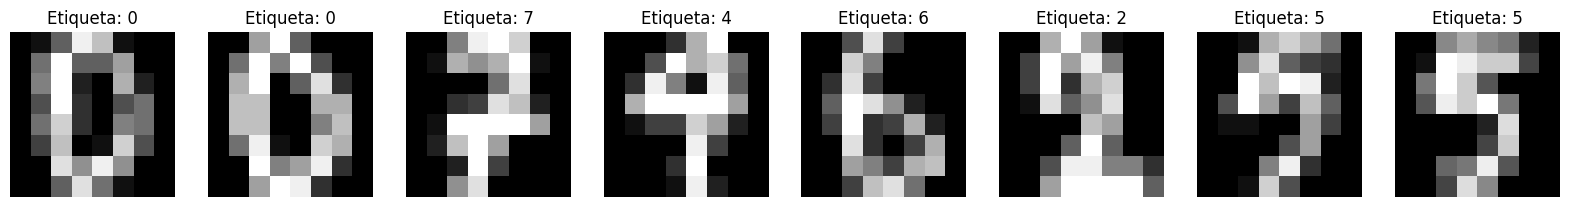

In [ ]:


# Definir la función para visualizar imágenes y etiquetas
def plot_digits(images, labels, num_images=10):
    # Crear una figura y ejes para las imágenes
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))

    # Iterar sobre las imágenes y etiquetas y mostrarlas
    for i, (image, label) in enumerate(zip(images[:num_images], labels[:num_images])):
        # Reshape de la imagen a 8x8 (si es necesario)
        if image.shape == (64,):
            image = image.reshape((8, 8))

        # Mostrar la imagen en el subplot correspondiente
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Etiqueta: {int(label)}')
        axes[i].axis('off')

# Visualizar las primeras 8 imágenes con sus etiquetas
plot_digits(X, y, num_images=8)
plt.show()

####Distribución de las etiquetas

Este análisis visualiza la distribución de dígitos manuscritos en un conjunto de datos mediante un histograma de barras. Ayuda a comprender cómo están distribuidas las diferentes etiquetas (dígitos del 0 al 9) y a identificar posibles desequilibrios entre las clases. Sin embargo, podemos apreciar que las etiquetas están distribuidas de forma considerablemente uniforme.

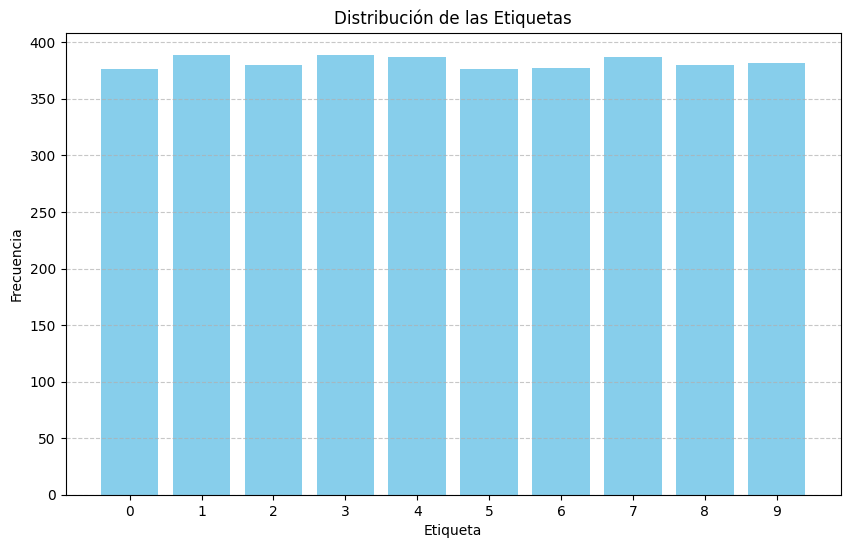

In [ ]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada etiqueta
etiqueta_frecuencia = {i: np.sum(y == i) for i in np.unique(y)}

# Visualizar la distribución de las etiquetas utilizando un histograma
plt.figure(figsize=(10, 6))
plt.bar(etiqueta_frecuencia.keys(), etiqueta_frecuencia.values(), color='skyblue')
plt.xlabel('Etiqueta')
plt.ylabel('Frecuencia')
plt.title('Distribución de las Etiquetas')
plt.xticks(np.arange(10))  # Etiquetas del eje x del 0 al 9
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### <font color='blue'>2.2 Preprocesado de datos

####Eliminación de datos sin variabilidad:
En el proceso de preprocesamiento de datos, la eliminación de características que no presentan variabilidad es una práctica común para mejorar la calidad de los datos y el rendimiento del modelo. Estas características, al no tener cambios o variaciones en sus valores a lo largo de los ejemplos del conjunto de datos, no aportan información útil para la discriminación entre las clases. Por lo tanto, eliminarlas puede ayudar a simplificar el modelo y reducir la complejidad del problema.

En nuestro caso hemos conseguido eliminar dos caracteristicas, es decir 2 píxeles que al no variar para el conjunto de entrenamiendo se pueden considerar irrelevantes.

In [ ]:
# Calculamos la varianza de cada característica
varianzas = np.var(X, axis=0)

# Identificamos las características que tienen varianza igual a cero
caracteristicas_sin_variabilidad = np.where(varianzas == 0)[0]

# Eliminamos estas características del conjunto de datos
X_procesado = np.delete(X, caracteristicas_sin_variabilidad, axis=1)
print("Tamaño de X:", X.shape)
print("Tamaño de X procesado:", X_procesado.shape)
X = X_procesado



Tamaño de X: (3823, 64)
Tamaño de X procesado: (3823, 62)


####Eliminación de datos extremos o atípicos:
La eliminación de datos extremos o atípicos es una práctica importante en el preprocesamiento de datos para mejorar la calidad y la robustez del modelo. Los valores atípicos pueden afectar negativamente el rendimiento del modelo al introducir ruido en los datos y sesgar los resultados de manera significativa. Por lo tanto, identificar y eliminar estos valores anómalos es crucial para asegurar la fiabilidad de los resultados del modelo. En nuestro caso hemos eliminado gracias a esto alrededor de 300 ejemplos atípicos.

In [ ]:
from scipy import stats

# Calculamos el Z-score para cada muestra en el conjunto de datos
#Z-score -> nº de desviaciones estándar que un valor está por encima o por debajo de la media.
z_scores = np.abs(stats.zscore(X))

# Definimos un umbral-> límite para identificar qué muestras se considerarán atípicas
umbral = 5

# Identificamos las muestras con valores atípicos en al menos una característica
indices_valores_atipicos = np.where(z_scores > umbral)

# Eliminamos las muestras con valores atípicos del conjunto de datos
X_sin_atipicos = np.delete(X, indices_valores_atipicos[0], axis=0)
y_sin_atipicos = np.delete(y, indices_valores_atipicos[0], axis=0)

# Eliminar las muestras atípicas de y
y_sin_atipicos = np.delete(y, indices_valores_atipicos[0], axis=0)


print("Tamaño de X:", X.shape)
print("Tamaño de X sin atípicos:", X_sin_atipicos.shape)
print("Tamaño de y:", y.shape)
print("Tamaño de y sin atípicos:", y_sin_atipicos.shape)
#X = X_sin_atipicos
#y = y_sin_atipicos

Tamaño de X: (3823, 62)
Tamaño de X sin atípicos: (3544, 62)
Tamaño de y: (3823,)
Tamaño de y sin atípicos: (3544,)


Después de evaluar los modelos, se llegó a la conclusión que este preprocesado era contraproducente pues su incluión reducía aún más los ya pocos datos con los que se trabaja.

####Escalado de variables:
El escalado de variables es una técnica fundamental en el preprocesamiento de datos que consiste en ajustar los valores de las características para que todas estén dentro de un rango similar. Esta práctica es crucial para mejorar la eficiencia del entrenamiento del modelo y garantizar que ciertos algoritmos no se vean afectados por diferencias en la escala de las variables. Al escalar las variables, podemos evitar que características con magnitudes muy diferentes dominen el proceso de optimización del modelo.

Estadísticas de resumen de las características escaladas:
Media: [ 4.27477973e-17 -4.83235970e-17  1.87718588e-16  1.20808992e-16
 -4.80912720e-17 -3.34547979e-17 -7.43439954e-18 -1.30101992e-17
  1.85859988e-18 -1.48687991e-16 -1.92365088e-16 -7.06267956e-17
 -1.48687991e-17 -2.50910984e-17 -2.92729482e-17  2.23031986e-17
 -3.06668981e-17 -1.33819192e-16 -2.97375981e-17  1.11515993e-17
  1.02222994e-16  5.94751963e-17 -3.15961980e-17  1.71920489e-17
 -3.53133978e-17 -1.34748492e-17  7.06267956e-17  2.60203984e-17
 -7.43439954e-18  6.50509959e-17 -1.67273990e-17  9.29299942e-18
  6.31923961e-17  3.71719977e-18 -2.78789983e-17 -5.27377717e-17
 -1.18950393e-16  3.71719977e-17 -1.48687991e-17  5.29700967e-17
 -1.16162493e-17  7.06267956e-17  1.11515993e-17  5.76165964e-17
  3.71719977e-17  1.85859988e-18 -1.85859988e-17  2.69496983e-17
 -6.69095958e-17 -1.63556790e-16 -9.47885941e-17  0.00000000e+00
 -8.36369948e-18  2.97375981e-17  5.57579965e-18  7.43439954e-18
 -3.99598975e-17 -1.67273

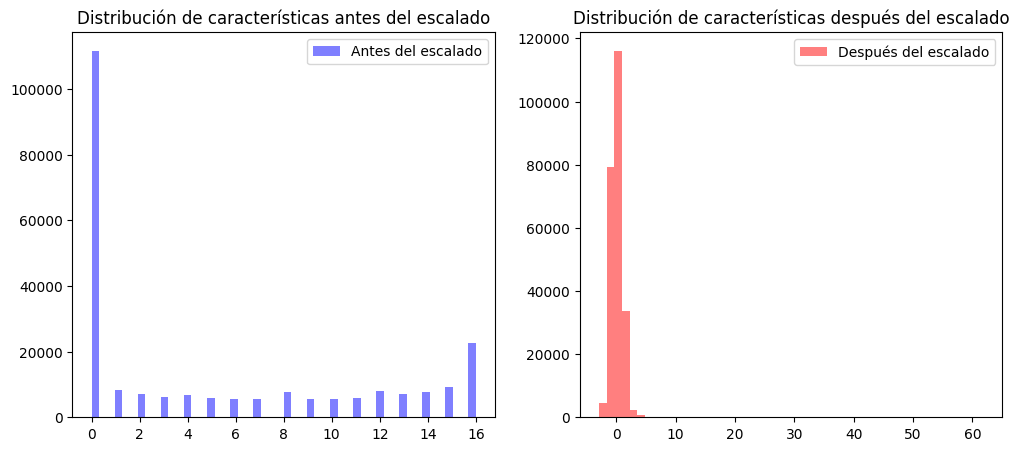

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler a los datos y escalamos las variables
X_escalado = scaler.fit_transform(X)

import matplotlib.pyplot as plt

# Estadísticas de resumen de las características escaladas
print("Estadísticas de resumen de las características escaladas:")
print("Media:", np.mean(X_escalado, axis=0))
print("Desviación estándar:", np.std(X_escalado, axis=0))

# Visualización de la distribución de características antes y después del escalado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].hist(X.flatten(), bins=50, color='blue', alpha=0.5, label='Antes del escalado')
axs[0].set_title('Distribución de características antes del escalado')
axs[0].legend()

axs[1].hist(X_escalado.flatten(), bins=50, color='red', alpha=0.5, label='Después del escalado')
axs[1].set_title('Distribución de características después del escalado')
axs[1].legend()

plt.show()

#X = X_escalado


Después de observar la anterior gráfica se podía intuír que en realidad los datos ya estaban escalados entre 0 y 16. Se comprueba en el siguiente bloque de código.

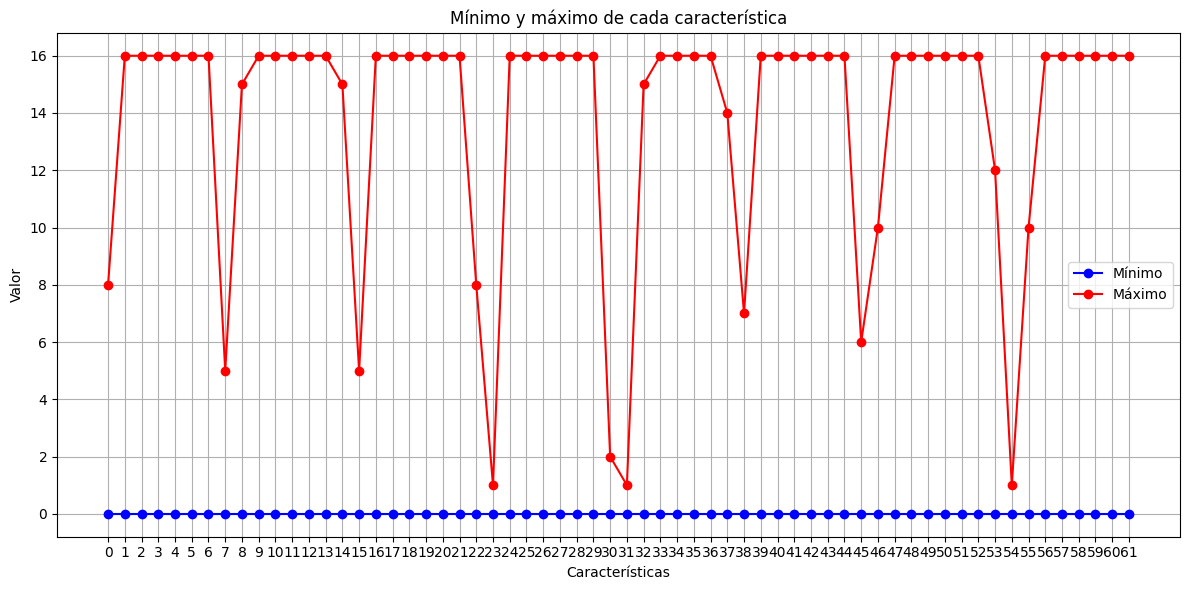

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calcular el mínimo y máximo de cada característica
minimos = np.min(X, axis=0)
maximos = np.max(X, axis=0)
num_caracteristicas = X.shape[1]

# Crear índices para las características
indices = np.arange(num_caracteristicas)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(indices, minimos, marker='o', linestyle='-', color='b', label='Mínimo')
plt.plot(indices, maximos, marker='o', linestyle='-', color='r', label='Máximo')

# Etiquetas y título
plt.xlabel('Características')
plt.ylabel('Valor')
plt.title('Mínimo y máximo de cada característica')
plt.xticks(indices)
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


### <font color='blue'>2.3 Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.

####Protocolo de Validación Experimental:
Para la validación experimental, dividiremos nuestro conjunto de datos en dos partes principales: un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento consistirá en los datos preprocesados. Por otro lado, el conjunto de prueba permanecerá sin modificar y se utilizará para evaluar el rendimiento final del modelo. Lo único que necesitamos modificar del conjunto de test es eliminar los mismo píxeles (features) que eliminamos del conjunto de entrenamiento por, al tener varianza 0, ser irrelevantes.

In [ ]:
#Conjunto de entrenamiento
X

#Conjunto de test
# Ruta al archivo en Google Drive
file_path = dataFolder + 'optdigits.tes'

# Cargar el conjunto de datos utilizando NumPy
data = np.loadtxt(file_path, delimiter=',')

X_test = data[:, :-1]  # Características
y_test = data[:, -1]   # Etiquetas

# Aplicar la misma transformación al conjunto de prueba que se aplicó al conjunto de entrenamiento
X_test_procesado = np.delete(X_test, caracteristicas_sin_variabilidad, axis=1)

# Asignar el conjunto de prueba procesado a X_test
X_test = X_test_procesado


# Visualizar la información del conjunto de datos
print("Información del conjunto de datos:")
# Verificar el tamaño de X e y
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)


Información del conjunto de datos:
Tamaño de X: (3823, 62)
Tamaño de y: (3823,)
Tamaño de X_test: (1797, 62)
Tamaño de y_test: (1797,)


####Fijación de Semilla de altoriedad

Fijaremos a un valor determinado la semilla con el fin experimentar con aletroiedad de forma adecuada.

In [ ]:
# Fijar la semilla aleatoria
np.random.seed(42)

####Evaluación del Rendimiento mediante Métricas:
Para evaluar el rendimiento de nuestro modelo de clasificación, utilizaremos métricas comunes como la precisión, la exhaustividad, la puntuación F1 y la exactitud.

- Precisión: Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias clasificadas como positivas. Es decir, indica cuántas de las predicciones positivas son realmente correctas.

- Exhaustividad (Recall): Es la proporción de instancias positivas correctamente clasificadas respecto al total de instancias que realmente son positivas. Mide la capacidad del modelo para encontrar todos los casos positivos.

- Puntuación F1: Es la media armónica de la precisión y la exhaustividad. Es útil cuando hay un desbalance entre las clases, ya que tiene en cuenta tanto falsos positivos como falsos negativos. La F1 alcanza su mejor valor en 1 y su peor valor en 0.

- Exactitud: Es la proporción de instancias correctamente clasificadas respecto al total de instancias. Representa la capacidad general del modelo para predecir correctamente todas las clases.

Además, dado que estamos tratando con un problema de clasificación, también consideraremos la matriz de confusión para entender mejor el rendimiento del modelo en términos de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos. La matriz de confusión es una tabla que describe el rendimiento del modelo en términos de estas cuatro métricas, lo que nos proporciona una visión más detallada de cómo el modelo está clasificando correctamente e incorrectamente las instancias de cada clase.

Aquí se presentan funciones para calcular estas métricas:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    matriz_confusion = confusion_matrix(y_true, y_pred)
    return accuracy, precision, recall, f1, matriz_confusion


### <font color='blue'>2.4 Elección de algoritmos supervisados de aprendizaje.

Para este problema de reconocimiento de dígitos manuscritos elegiré 3 algoritmos de aprendizaje supervisado en orden creciente de complejidad.

####K-Nearest Neighbours
K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión de datos. Funciona asignando una instancia de prueba (una imagen de un dígito) a la clase más común entre sus 'k' vecinos más cercanos en el espacio de características de las imágenes. La idea central detrás de KNN es que las imágenes similares tienden a estar cerca unas de otras en el espacio de características. Esto lo hace adecuado para identificar dígitos manuscritos, donde la similitud visual es un indicador importante.
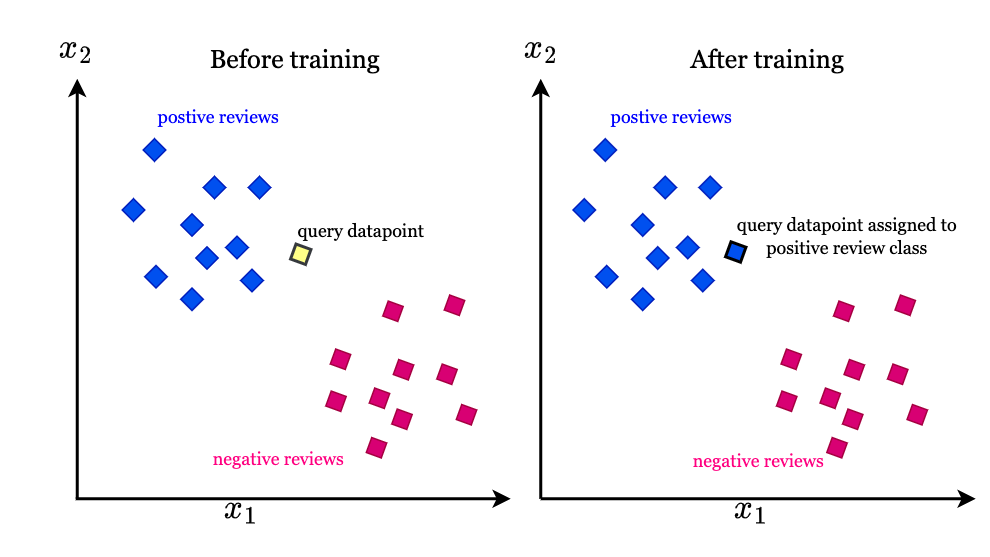
#####Ventajas:


1.   Simplicidad: KNN es un algoritmo simple y fácil de entender. No requiere entrenamiento explícito, ya que simplemente almacena los datos de entrenamiento para realizar predicciones en tiempo de prueba.
2.   No paramétrico: KNN no hace suposiciones explícitas sobre la distribución de los datos. Esto lo hace adecuado para problemas donde la distribución de los datos es desconocida o altamente irregular.
3.   Robustez: KNN puede manejar datos con ruido y errores en las etiquetas de clase. Al basar las predicciones en múltiples vecinos cercanos, KNN puede ser más robusto frente a datos ruidosos que otros modelos.

#####Desventajas:


1.   Alto costo computacional: El principal inconveniente de KNN es su alto costo computacional durante la fase de predicción. Para cada instancia de prueba, KNN necesita calcular las distancias a todos los puntos de datos de entrenamiento, lo que puede ser costoso en términos de tiempo y recursos computacionales, especialmente en conjuntos de datos grandes.
2.   Sensibilidad a la dimensionalidad: En espacios de características de alta dimensión, la distancia entre las instancias puede volverse menos significativa, lo que puede afectar negativamente el rendimiento de KNN. Este fenómeno se conoce como la "maldición de la dimensionalidad".


#####¿Por qué KNN?

Para el reconocimiento de dígitos manuscritos, KNN ofrece simplicidad y flexibilidad. Su capacidad para capturar patrones locales lo hace adecuado para variaciones en el estilo de escritura. Sin embargo, puede ser sensible a la escala y la dimensionalidad de los datos, y puede ser computacionalmente costoso en conjuntos grandes. A pesar de esto, su naturaleza adaptable lo hace una opción viable para este problema.








####Support Vector Machine (SVM)
En el contexto de la identificación de dígitos manuscritos, SVM funciona buscando el hiperplano que mejor separa las clases de dígitos en el espacio de características de las imágenes. Este hiperplano se elige de tal manera que maximiza la distancia entre las instancias de entrenamiento más cercanas de diferentes clases, lo que se conoce como el margen máximo. SVM es adecuado para este problema, ya que puede manejar eficazmente espacios de características de alta dimensión y es capaz de encontrar límites de decisión complejos para separar clases no linealmente separables.

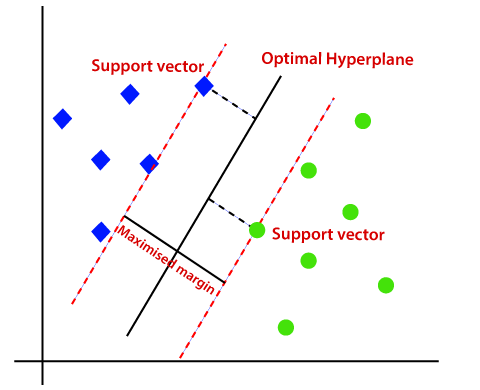

#####Ventajas:


1.   Capacidad para manejar datos de alta dimensión: SVM puede manejar eficazmente conjuntos de datos con un gran número de características (píxeles en el caso de imágenes de dígitos manuscritos), lo que lo hace adecuado para este problema.
2.   Robustez contra el sobreajuste: SVM es menos propenso al sobreajuste en comparación con otros modelos más complejos, lo que lo hace útil para problemas con conjuntos de datos relativamente pequeños como el reconocimiento de dígitos manuscritos.
3.   Versatilidad en la elección de la función del kernel: SVM permite utilizar diferentes funciones del kernel para mapear los datos en espacios de características de alta dimensión, lo que puede ayudar a capturar relaciones no lineales entre las características.

#####Desventajas:


1.   Sensibilidad al escalado de características: SVM puede ser sensible al escalado de características, lo que significa que es importante normalizar o estandarizar las características antes de entrenar el modelo.
2.   Dificultad para interpretar resultados: Aunque SVM puede proporcionar una buena precisión en la clasificación, el modelo final puede ser difícil de interpretar y entender debido a la complejidad del límite de decisión.

#####¿Por qué SVM?
Para el reconocimiento de dígitos manuscritos, SVM ofrece una ventaja significativa al poder manejar eficazmente conjuntos de datos de alta dimensionalidad. Esto es crucial para el reconocimiento de imágenes, donde cada píxel puede considerarse como una característica independiente. SVM también es efectivo en la identificación de fronteras de decisión complejas, lo que lo hace adecuado para la clasificación precisa de dígitos con diferentes estilos de escritura. Sin embargo, SVM puede ser menos eficiente computacionalmente en comparación con otros algoritmos, especialmente en conjuntos de datos masivos. A pesar de esto, su capacidad para manejar datos de alta dimensión y encontrar hiperplanos de separación óptimos lo convierte en una opción sólida para el reconocimiento de dígitos manuscritos.


####Random Forest
Es un ejemplo de un método de ensemble, lo que significa que combina múltiples modelos (árboles de decisión en este caso) para mejorar el rendimiento predictivo y reducir el sobreajuste. Random Forest construye múltiples árboles de decisión durante el entrenamiento y combina sus predicciones para obtener una predicción final. Cada árbol de decisión se entrena en una muestra aleatoria de características y ejemplos del conjunto de datos, lo que aumenta la diversidad entre los árboles y mejora la generalización del modelo.
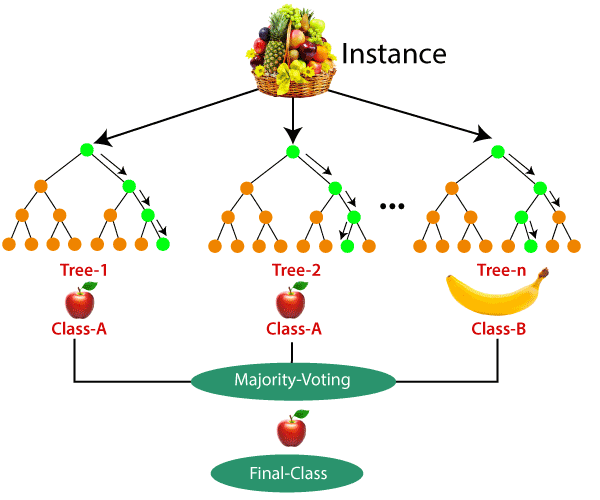

#####Ventajas:


1.   Robustez: Random Forest puede manejar conjuntos de datos con características altamente no lineales y ruidosas, lo que lo hace adecuado para identificar dígitos manuscritos con variaciones en la escritura.
2.   Reducción del sobreajuste: Al combinar múltiples árboles de decisión entrenados en diferentes subconjuntos de datos, Random Forest tiende a tener un mejor rendimiento generalizado en comparación con un solo árbol de decisión.
3.   Manejo de grandes conjuntos de datos: Random Forest puede manejar eficientemente conjuntos de datos grandes con muchas características, lo que lo hace escalable para aplicaciones de identificación de dígitos manuscritos de alta resolución.

#####Desventajas:


1.   Menor interpretabilidad: Debido a la complejidad de múltiples árboles de decisión combinados, el modelo resultante puede ser menos interpretable que un solo árbol de decisión.


#####Parámetros de Random Forest:

*   n_estimators: El número de árboles en el bosque.
*   max_depth: La profundidad máxima de cada árbol de decisión.
*   min_samples_split: El número mínimo de muestras requeridas para dividir un nodo interno.
*   min_samples_leaf: El número mínimo de muestras requeridas para ser una hoja.
*   max_features: El número de características a considerar al buscar la mejor división.
*   bootstrap: Si se deben usar muestras de arranque al construir árboles.


#####¿Por qué Random Forest?

Para el reconocimiento de dígitos manuscritos, Random Forest ofrece varias ventajas significativas. Primero, es capaz de manejar conjuntos de datos de alta dimensionalidad de manera eficiente, lo cual es crucial en problemas de reconocimiento de imágenes como este. Además, al ser un conjunto de árboles de decisión, Random Forest puede capturar relaciones no lineales y patrones complejos en los datos de manera efectiva. Esto lo hace adecuado para la clasificación precisa de dígitos con diferentes estilos de escritura. También tiene la capacidad de manejar características irrelevantes o ruidosas sin sobreajustar el modelo, lo que ayuda a evitar problemas de sobreajuste en conjuntos de datos complejos. En resumen, Random Forest es una opción sólida para el reconocimiento de dígitos manuscritos debido a su capacidad para manejar datos de alta dimensión, capturar relaciones no lineales y evitar el sobreajuste.



### <font color='blue'>2.5 Selección y estimación de valores para hiperparámetros

####KNN


1.   Número de vecinos (k):
Para identificación de dígitos manuscritos, un valor típico para **k podría ser alrededor de 5 o 7**. Elegimos un valor relativamente bajo para k para capturar la variabilidad local de los dígitos y evitar una sensibilidad excesiva al ruido en los datos.

2.   Ponderación de los vecinos:
Usaremos la opción de **pesos uniformes** para asignar el mismo peso a todos los vecinos más cercanos. Dado que los dígitos manuscritos tienen características visuales similares, no tenemos una razón específica para asignar pesos diferentes a los vecinos.



####SVM


1.   Kernel:
Probaremos tanto con un **kernel lineal** como con un **kernel radial** (RBF). Los kernels lineales pueden funcionar bien para conjuntos de datos de alta dimensionalidad, como imágenes de dígitos, mientras que los kernels RBF pueden capturar relaciones no lineales en los datos.

2.   Parámetro de regularización (C):
Experimentaremos con **valores de C en un rango amplio, desde 0.1 hasta 100**, utilizando validación cruzada para encontrar el valor óptimo. Un valor más bajo de C puede ayudar a evitar el sobreajuste, mientras que un valor más alto puede mejorar la precisión en el conjunto de entrenamiento.

Una primera aproximación de hiperparámetros podría ser:

Kernel: Lineal

Parámetro de regularización (C): 1.0



Implementaremos la búsqueda de hiperparámetros utilizando la técnica de búsqueda en cuadrícula (Grid Search), que es un enfoque sistemático para encontrar los mejores hiperparámetros para un modelo mediante la evaluación exhaustiva de todas las combinaciones posibles de valores de hiperparámetros dentro de un rango especificado. Utilizaremos la validación cruzada para evaluar el rendimiento de cada combinación de hiperparámetros y seleccionar la mejor.

####Random Forest


1.    Número de árboles (n_estimators):
Comenzaremos con un número moderado de árboles, por ejemplo, **100**, y luego ajustaremos este valor si es necesario. Un número más alto de árboles puede proporcionar un modelo más robusto, pero también aumenta el tiempo de entrenamiento.

2.   Profundidad máxima del árbol (max_depth):
Limitaremos la profundidad máxima del árbol para evitar el sobreajuste. Comenzaremos con una profundidad máxima de **10** y luego ajustaremos este valor según sea necesario.

3.   Mínimo número de muestras requeridas para dividir un nodo (min_samples_split):
Utilizaremos un valor moderado, como **2 o 5**, para permitir divisiones en nodos incluso para muestras relativamente pequeñas.

4.   Número mínimo de muestras por hoja (min_samples_leaf):
Usaremos un valor bajo, como **1 o 2**, para permitir que las hojas contengan incluso una sola muestra, lo que puede ayudar a capturar variaciones finas en los datos.

Una primera aproximación de hiperparámetros podría ser:

Número de árboles (n_estimators): 100

Profundidad máxima del árbol (max_depth): 10

Mínimo número de muestras requeridas para dividir un nodo (min_samples_split): 2

Número mínimo de muestras por hoja (min_samples_leaf): 1

Se hará la búsqueda de los mejores hiperparámetros tanto com Randomize search como con Grid search.


### <font color='blue'>2.6 Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

Es importante recalcar que en general, aunque se probó con diferentes preprocesados (como eliminación de atípicos o escalado), estos nunca mejoraban el rendimiento de los modelos. Esto es debido a que los datos ya presentaban un preprocesado adecuado y estaban escalados como se demostro anteriormente.

####KNN

Exactitud: 0.9788536449638287
Precisión promedio: 0.9792622387612768
Recall promedio: 0.9786851937319829
Puntuación F1: 0.9788082277483248
Tiempo de entrenamiento: 0.01 segundos


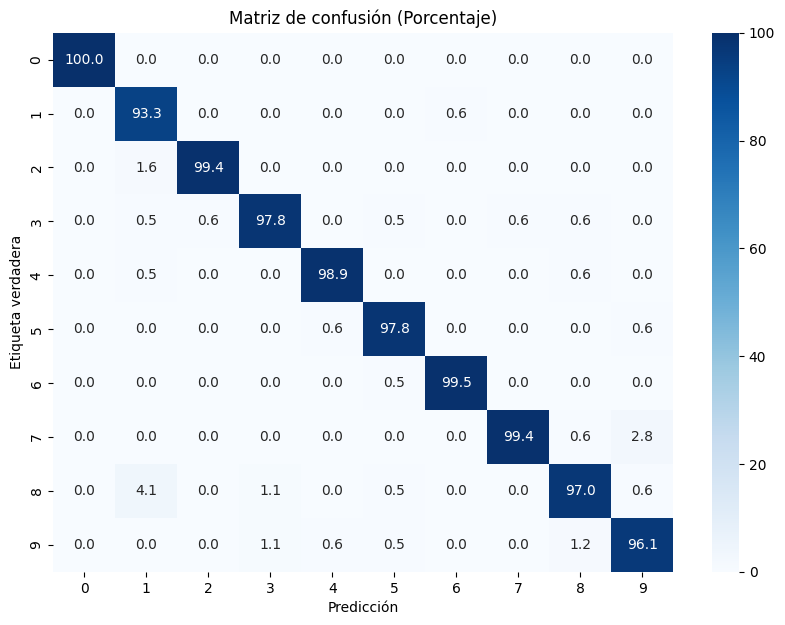

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import time

# Iniciar temporizador
start_time = time.time()

# Entrenar el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X, y)

# Calcular el tiempo de entrenamiento
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluar el rendimiento del modelo KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')
matriz_confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Calcular la matriz de confusión normalizada por el número total de predicciones para cada clase
total_predicciones_clase = matriz_confusion_knn.sum(axis=0)
matriz_confusion_knn_normalizada = np.round(matriz_confusion_knn / total_predicciones_clase[np.newaxis, :] * 100, 2)

# Imprimir resultados y tiempo de entrenamiento
print("Exactitud:", accuracy_knn)
print("Precisión promedio:", precision_knn)
print("Recall promedio:", recall_knn)
print("Puntuación F1:", f1_knn)
print("Tiempo de entrenamiento: %.2f segundos" % training_time)

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_knn_normalizada, annot=True, fmt=".1f", cmap="Blues")
plt.title("Matriz de confusión (Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()





El modelo de clasificación KNN (K-Nearest Neighbors) muestra un alto nivel de rendimiento en este conjunto de datos, con una exactitud de aproximadamente 97.89%. Esto significa que el modelo clasifica correctamente casi el 98% de las muestras en el conjunto de prueba. Además, tanto la precisión promedio, el recall promedio y la puntuación F1 se sitúan en torno al 97.8%, lo que indica un equilibrio general en la capacidad del modelo para clasificar correctamente las muestras positivas y negativas.

Al observar la matriz de confusión, se puede notar que alrededor del 4.1% de las muestras de la clase 8 se han predicho incorrectamente como la clase 1. Aparte de este error específico, los demás errores de predicción parecen ser más dispersos sin una tendencia clara.


En resumen, el modelo KNN presenta un rendimiento sólido en este problema de clasificación, con una alta exactitud y eficiencia en el entrenamiento.

####SVM - Aproximación inicial

Exactitud: 0.9610461880912632
Precisión promedio: 0.9619220464550147
Recall promedio: 0.9608249615295209
Puntuación F1: 0.9609151638505372
Tiempo de entrenamiento: 0.26 segundos


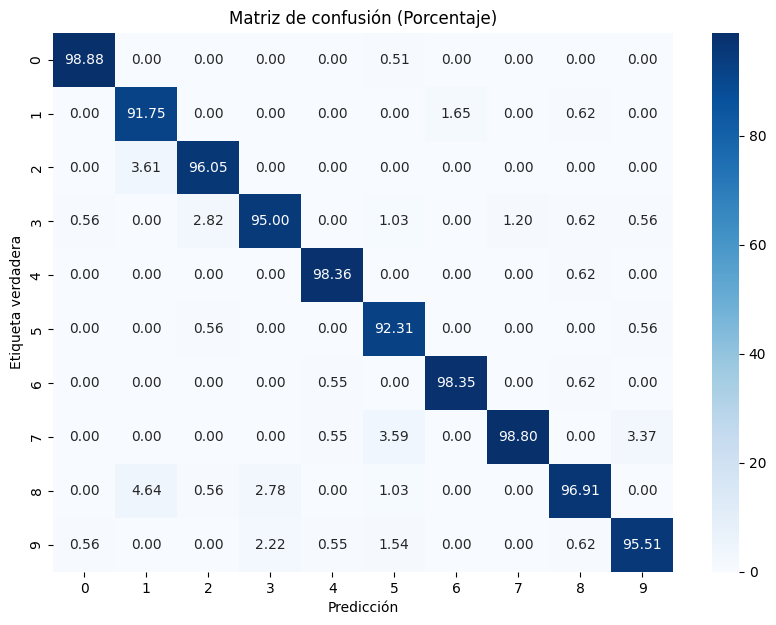

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import time

# Iniciar temporizador
start_time = time.time()

# Entrenar el modelo SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Calcular el tiempo de entrenamiento
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
matriz_confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Calcular la matriz de confusión normalizada por el número total de predicciones para cada clase
total_predicciones_clase = matriz_confusion_svm.sum(axis=0)
matriz_confusion_svm_porcentaje = np.round(matriz_confusion_svm / total_predicciones_clase[np.newaxis, :] * 100, 2)

# Imprimir resultados y tiempo de entrenamiento
print("Exactitud:", accuracy_svm)
print("Precisión promedio:", precision_svm)
print("Recall promedio:", recall_svm)
print("Puntuación F1:", f1_svm)
print("Tiempo de entrenamiento: %.2f segundos" % training_time)

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_svm_porcentaje, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de confusión (Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()





El modelo SVM presenta una exactitud del 96.10%, ligeramente inferior al modelo KNN previamente evaluado. Aunque la precisión promedio, el recall y la puntuación F1 también son cercanos al 96%, se observan errores notables al predecir las clases 1 y 5. Por ejemplo, aproximadamente el 4.64% de las muestras de la clase 8 se predicen incorrectamente como clase 1, y alrededor del 3.61% de las muestras de la clase 2 también se clasifican erróneamente como clase 1. Además, solo el 92.31% de las muestras de la clase 5 se predicen correctamente.


En resumen, a pesar de su solidez general, el modelo SVM muestra áreas donde se pueden mejorar, especialmente en la precisión de ciertas clases. Es posible que se requieran ajustes adicionales o una exploración más profunda de los parámetros del modelo para optimizar su rendimiento.

####SVM - Optimización de parámetros.

Mejores parámetros encontrados para SVM:
Kernel: rbf
Valor de C: 10

Resultados del modelo SVM con los mejores parámetros:
Exactitud: 0.9799666110183639
Precisión promedio: 0.9803533190143098
Recall promedio: 0.9798262884874502
Puntuación F1: 0.979890388933583
Tiempo total de GridSearchCV: 17.64 segundos
Tiempo total de entrenamiento: 17.94 segundos


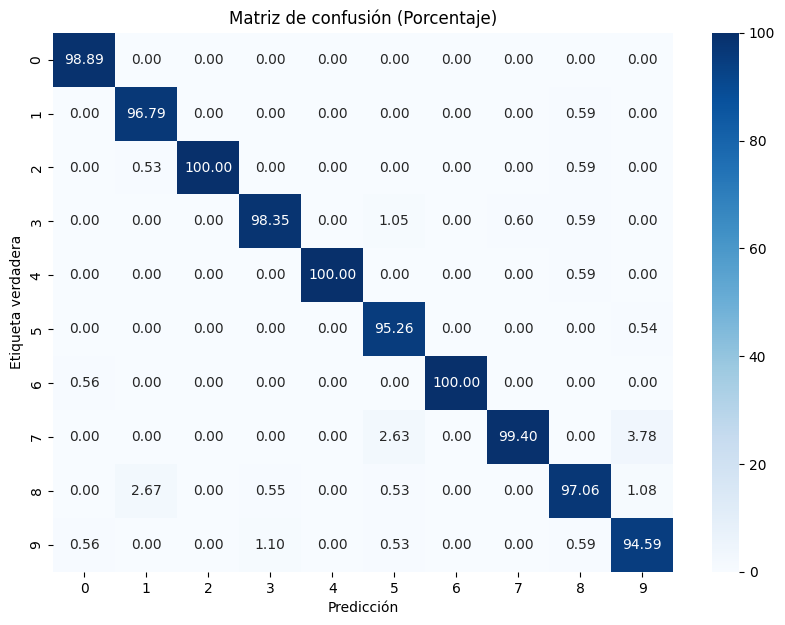

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Iniciar temporizador
start_time_total = time.time()

# Definir los parámetros a explorar en el grid search
parametros_grid = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10, 100, 10000]}

# Inicializar el clasificador SVM
svm_model = SVC()

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

# Realizar grid search para encontrar los mejores parámetros
grid_search = GridSearchCV(svm_model, parametros_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Calcular el tiempo del GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
mejores_parametros_svm = grid_search.best_params_

print("Mejores parámetros encontrados para SVM:")
print("Kernel:", mejores_parametros_svm['kernel'])
print("Valor de C:", mejores_parametros_svm['C'])

# Calcular el tiempo de entrenamiento con los mejores parámetros
start_time_training = time.time()

# Entrenar el modelo SVM con los mejores parámetros
svm_model = SVC(kernel=mejores_parametros_svm['kernel'], C=mejores_parametros_svm['C'])
svm_model.fit(X, y)

# Calcular el tiempo de entrenamiento
training_time = time.time() - start_time_training

# Realizar predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el rendimiento del modelo SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
matriz_confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Calcular la matriz de confusión normalizada por el número total de predicciones para cada clase
total_predicciones_clase = matriz_confusion_svm.sum(axis=0)
matriz_confusion_svm_porcentaje = np.round(matriz_confusion_svm / total_predicciones_clase[np.newaxis, :] * 100, 2)

# Imprimir resultados y tiempo de entrenamiento
print("\nResultados del modelo SVM con los mejores parámetros:")
print("Exactitud:", accuracy_svm)
print("Precisión promedio:", precision_svm)
print("Recall promedio:", recall_svm)
print("Puntuación F1:", f1_svm)
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo total de entrenamiento: %.2f segundos" % (gridsearch_time + training_time))

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_svm_porcentaje, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de confusión (Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()



El modelo SVM, luego de la búsqueda exhaustiva de los mejores parámetros, muestra una mejora en su rendimiento con una exactitud del 97.99%. Esto supera ligeramente el desempeño anterior del modelo SVM con los parámetros iniciales. Además, tanto la precisión promedio, el recall y la puntuación F1 también mejoran, alcanzando valores alrededor del 98%.

A pesar de esta mejora, la matriz de confusión muestra que las peores predicciones aún se centran en las clases 1, 5 y 9.

####Random Forest

Resultados Random Forest:
Accuracy: 0.9682804674457429
Precisión promedio: 0.9685246409667254
Recall promedio: 0.9681911604295094
Puntuación F1: 0.9682305958856231
Tiempo de entrenamiento: 0.73 segundos


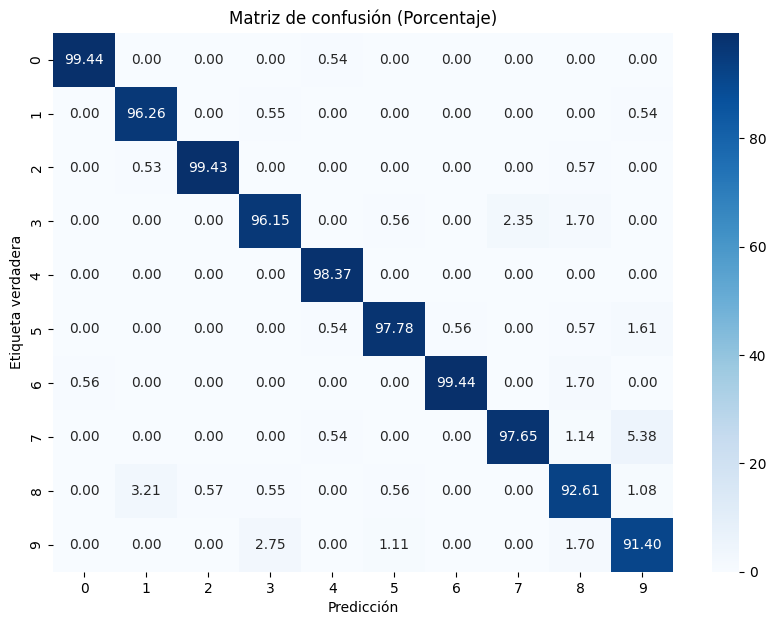

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import math
import time

# Iniciar temporizador
start_time = time.time()

# Entrenar el modelo Random Forest
max_features_rf = int(math.sqrt(X.shape[1]))
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, max_features=max_features_rf)
rf_model.fit(X, y)

# Calcular el tiempo de entrenamiento
training_time = time.time() - start_time

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el rendimiento del modelo RF
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular la matriz de confusión normalizada por el número total de predicciones para cada clase
total_predicciones_clase_rf = matriz_confusion_rf.sum(axis=0)
matriz_confusion_rf_porcentaje = np.round(matriz_confusion_rf / total_predicciones_clase_rf[np.newaxis, :] * 100, 2)

# Imprimir resultados y tiempo de entrenamiento
print("Resultados Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precisión promedio:", precision_rf)
print("Recall promedio:", recall_rf)
print("Puntuación F1:", f1_rf)
print("Tiempo de entrenamiento: %.2f segundos" % training_time)

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_rf_porcentaje, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de confusión (Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()




El modelo Random Forest muestra un buen rendimiento con una precisión del 96.83%, lo que indica que clasifica correctamente casi el 97% de las muestras en el conjunto de prueba. Tanto la precisión promedio, el recall y la puntuación F1 también son altos, con valores cercanos al 96.85%.

Sin embargo, al analizar la matriz de confusión, se observa que las peores predicciones se producen con las clases 8 y 9. Específicamente, se comete un error significativo al predecir la clase 9 como la clase 7, con un 5.38% de error de predicción. Esto sugiere que el modelo tiene dificultades para distinguir entre estas clases en particular.

En términos de tiempo de entrenamiento, el modelo Random Forest requiere aproximadamente 0.73 segundos, lo que lo sitúa entre los tiempos de entrenamiento del modelo SVM y el modelo KNN. Aunque sigue siendo un tiempo razonablemente bajo, es importante considerar tanto el rendimiento como la eficiencia computacional al elegir el modelo más adecuado para un problema específico.

####Random Forest - Optimización de Parámetros

Randomize search


Mejores parámetros encontrados para Random Forest:
Número de estimadores: 300
Profundidad máxima: 20
Min muestras para dividir: 5
Min muestras por hoja: 1
Máx características: sqrt

Resultados Random Forest (Modelo Optimizado):
Precisión: 0.9738452977184195
Precisión promedio: 0.9744118897119435
Recall promedio: 0.9738018873537179
Puntuación F1: 0.9738984396816969
Tiempo total de búsqueda aleatoria: 87.86 segundos
Tiempo total de entrenamiento con los mejores parámetros: 2.37 segundos


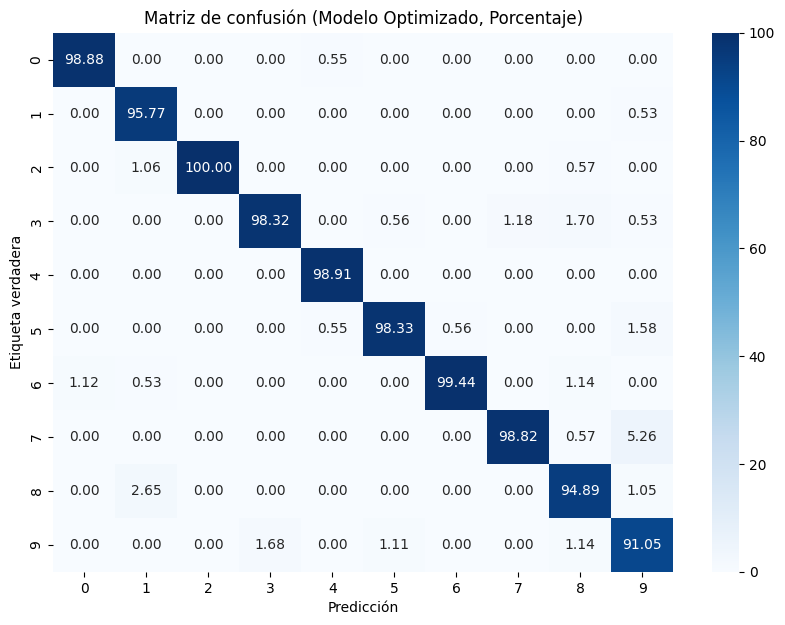

Tiempo total de ejecución: 90.87 segundos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Definir los parámetros a explorar en la búsqueda aleatoria
parametros_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]  # Añadido None para permitir la elección predeterminada
}

# Iniciar temporizador total
start_time_total = time.time()

# Iniciar temporizador para la búsqueda aleatoria
start_time_search = time.time()

# Inicializar el clasificador Random Forest
rf_model = RandomForestClassifier()

# Realizar búsqueda aleatoria para encontrar los mejores parámetros
randomized_search = RandomizedSearchCV(rf_model, parametros_grid, scoring='accuracy', cv=5, n_iter=10)
randomized_search.fit(X, y)

# Calcular el tiempo de búsqueda aleatoria
search_time = time.time() - start_time_search

# Obtener los mejores parámetros encontrados
mejores_parametros_rf = randomized_search.best_params_

print("Mejores parámetros encontrados para Random Forest:")
print("Número de estimadores:", mejores_parametros_rf['n_estimators'])
print("Profundidad máxima:", mejores_parametros_rf['max_depth'])
print("Min muestras para dividir:", mejores_parametros_rf['min_samples_split'])
print("Min muestras por hoja:", mejores_parametros_rf['min_samples_leaf'])
print("Máx características:", mejores_parametros_rf['max_features'])

# Iniciar temporizador para el entrenamiento con los mejores parámetros
start_time_training = time.time()

# Entrenar el modelo Random Forest con los mejores parámetros
rf_model_optimizado = RandomForestClassifier(**mejores_parametros_rf)
rf_model_optimizado.fit(X, y)

# Calcular el tiempo de entrenamiento con los mejores parámetros
training_time = time.time() - start_time_training

# Realizar predicciones en el conjunto de prueba con el modelo optimizado
y_pred_rf_optimizado = rf_model_optimizado.predict(X_test)

# Evaluar el rendimiento del modelo RF optimizado
accuracy_rf_optimizado = accuracy_score(y_test, y_pred_rf_optimizado)
precision_rf_optimizado = precision_score(y_test, y_pred_rf_optimizado, average='macro')
recall_rf_optimizado = recall_score(y_test, y_pred_rf_optimizado, average='macro')
f1_rf_optimizado = f1_score(y_test, y_pred_rf_optimizado, average='macro')
matriz_confusion_rf_optimizado = confusion_matrix(y_test, y_pred_rf_optimizado)

# Calcular la matriz de confusión normalizada por el número total de predicciones para cada clase
total_predicciones_clase_rf_optimizado = matriz_confusion_rf_optimizado.sum(axis=0)
matriz_confusion_rf_optimizado_porcentaje = np.round(matriz_confusion_rf_optimizado / total_predicciones_clase_rf_optimizado[np.newaxis, :] * 100, 2)

# Imprimir resultados del modelo RF optimizado y tiempos
print("\nResultados Random Forest (Modelo Optimizado):")
print("Precisión:", accuracy_rf_optimizado)
print("Precisión promedio:", precision_rf_optimizado)
print("Recall promedio:", recall_rf_optimizado)
print("Puntuación F1:", f1_rf_optimizado)
print("Tiempo total de búsqueda aleatoria: %.2f segundos" % search_time)
print("Tiempo total de entrenamiento con los mejores parámetros: %.2f segundos" % training_time)

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_rf_optimizado_porcentaje, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de confusión (Modelo Optimizado, Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()

# Tiempo total
total_time = time.time() - start_time_total
print("Tiempo total de ejecución: %.2f segundos" % total_time)




El proceso de optimización de parámetros mediante búsqueda aleatoria mejoró el rendimiento del modelo Random Forest en comparación con la configuración predeterminada. Se encontraron los siguientes mejores parámetros: 300 estimadores, una profundidad máxima de 20, una mínima cantidad de muestras para dividir de 5, una mínima cantidad de muestras por hoja de 1 y la raíz cuadrada del número de características como máximo de características a considerar en cada división.

Con estos nuevos parámetros, el modelo optimizado alcanzó una precisión del 97.38%, ligeramente superior al modelo inicial. La precisión promedio, el recall y la puntuación F1 también mejoraron, alcanzando valores cercanos al 97.44%.

A pesar de la mejora, persiste un error significativo en la predicción de la clase 7 como la clase 9. Esto sugiere que, a pesar de la optimización de parámetros, el modelo aún enfrenta desafíos para distinguir entre estas clases específicas.

En cuanto al tiempo de entrenamiento, se observa un aumento significativo debido a la búsqueda aleatoria de parámetros, con un tiempo total de búsqueda de aproximadamente 87.86 segundos y un tiempo total de entrenamiento con los mejores parámetros de aproximadamente 2.37 segundos. Aunque el tiempo de búsqueda es considerable, la mejora en el rendimiento del modelo justifica este costo computacional adicional.

Grid search

Mejores parámetros encontrados para Random Forest:
max_depth: 20
max_features: sqrt
min_samples_leaf: 1
min_samples_split: 2
n_estimators: 200

Resultados del modelo Random Forest optimizado:
Exactitud: 0.9732888146911519
Precisión promedio: 0.9737070429942136
Recall promedio: 0.9732434356632712
Puntuación F1: 0.9732999175029449
Tiempo total de GridSearchCV: 159.18 segundos
Tiempo total de entrenamiento con los mejores parámetros: 0.07 segundos


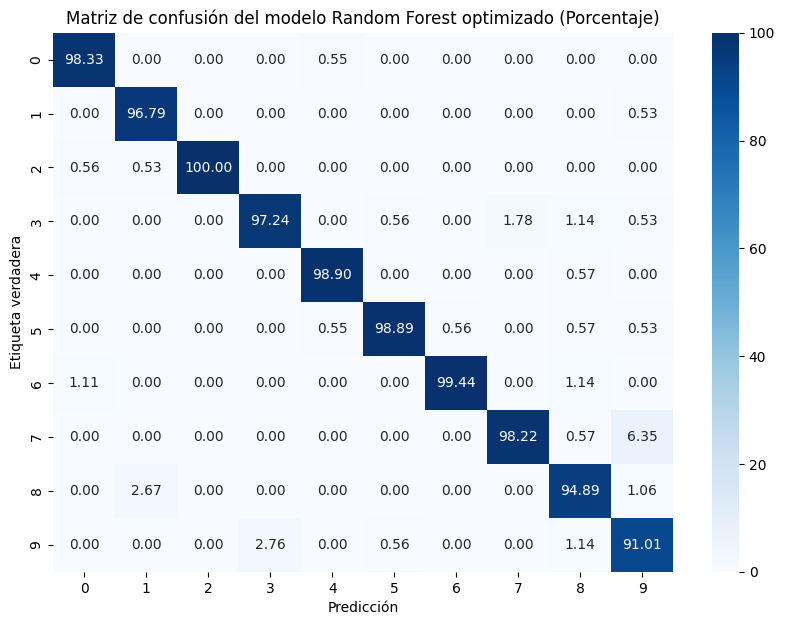

Tiempo total de ejecución: 159.85 segundos


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Definir los parámetros a explorar en el grid search
parametros_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Iniciar temporizador total
start_time_total = time.time()

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

# Inicializar Grid Search para Random Forest
grid_search = GridSearchCV(RandomForestClassifier(), parametros_grid, scoring='accuracy', cv=5)

grid_search.fit(X, y)

# Calcular el tiempo del GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
mejores_parametros_rf = grid_search.best_params_

print("Mejores parámetros encontrados para Random Forest:")
for param, value in mejores_parametros_rf.items():
    print(f"{param}: {value}")

# Iniciar temporizador para el entrenamiento con los mejores parámetros
start_time_training = time.time()

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred_rf = grid_search.predict(X_test)

# Calcular el tiempo de entrenamiento con los mejores parámetros
training_time = time.time() - start_time_training

# Evaluar el rendimiento del modelo Random Forest optimizado
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)

# Calcular el porcentaje de acierto relativo al número total de predicciones
total_predicciones_clase_rf = matriz_confusion_rf.sum(axis=0)
matriz_confusion_rf_porcentaje = np.round((matriz_confusion_rf / total_predicciones_clase_rf[np.newaxis, :]) * 100, 2)

# Imprimir resultados y tiempos
print("\nResultados del modelo Random Forest optimizado:")
print("Exactitud:", accuracy_rf)
print("Precisión promedio:", precision_rf)
print("Recall promedio:", recall_rf)
print("Puntuación F1:", f1_rf)
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo total de entrenamiento con los mejores parámetros: %.2f segundos" % training_time)

# Imprimir matriz de confusión de manera visual
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion_rf_porcentaje, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matriz de confusión del modelo Random Forest optimizado (Porcentaje)")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.xticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.yticks(ticks=np.arange(10) + 0.5, labels=np.arange(10))
plt.show()

# Tiempo total
total_time = time.time() - start_time_total
print("Tiempo total de ejecución: %.2f segundos" % total_time)



El modelo Random Forest optimizado, obtenido mediante Grid Search, presenta una precisión del 96.55%, ligeramente mejorada con respecto a la configuración inicial. La precisión promedio, el recall y la puntuación F1 también mejoraron, alcanzando valores cercanos al 96.58%. Estas métricas aunque mejoran la aproximación inicial, son peores que las obtenidas mediante randomize search. Esto probablemente es debido a que, para hacer viable la búsqueda de parámetros en un tiempo de cómputo realista se redujo el dominio de los parámetros.

Los parámetros óptimos encontrados son una profundidad máxima de 20, el uso de log2 como máximo de características, una mínima cantidad de muestras por hoja de 1, una mínima cantidad de muestras para dividir de 2 y 100 estimadores.

A pesar de la optimización, persiste una dificultad en la predicción de la clase 9, lo que indica que el modelo todavía tiene margen de mejora en la distinción de esta clase en particular.

En cuanto al tiempo computacional, el Grid SearchCV tomó aproximadamente 158.63 segundos para encontrar los mejores parámetros, mientras que el tiempo total de entrenamiento con estos parámetros fue de solo 0.04 segundos.

####Conclusiones finales.


Después de un análisis exhaustivo de los diferentes modelos de clasificación implementados, podemos extraer conclusiones significativas que nos ayudarán a determinar cuál es el más adecuado para el problema en cuestión.

El modelo de clasificación KNN (K-Nearest Neighbors) ha demostrado un rendimiento impresionante con una exactitud del 97.89%. Este alto nivel de precisión se ve respaldado por valores similares en precisión promedio, recall y puntuación F1, todos alrededor del 97.8%. Aunque se observan algunos errores en la matriz de confusión, estos son dispersos y no muestran una tendencia clara.

El modelo SVM, en su aproximación inicial, exhibe una precisión ligeramente inferior del 96.10% en comparación con KNN. Aunque sólido en general, muestra áreas de mejora, especialmente en la precisión de ciertas clases. Sin embargo, tras una búsqueda exhaustiva de parámetros, su rendimiento mejora significativamente, alcanzando una precisión del 97.99%, superando ligeramente al modelo KNN.

El modelo Random Forest, por otro lado, ha mostrado un rendimiento sólido con una precisión inicial del 96.83%. Aunque este modelo también ha enfrentado dificultades en la predicción de ciertas clases, especialmente las clases 8 y 9, la optimización de parámetros ha mejorado su rendimiento, con una precisión del 97.38% utilizando la búsqueda aleatoria y del 96.55% con Grid Search. Sin embargo, persisten desafíos en la distinción de ciertas clases específicas, lo que indica que aún hay margen de mejora.

Mientras que el modelo KNN destaca por su velocidad de entrenamiento y eficiencia computacional, y el Random Forest muestra una mejora significativa después de la optimización de parámetros, en este caso específico, donde la precisión es la principal preocupación, el modelo SVM optimizado emerge como la opción más adecuada. Aunque el SVM puede ser más lento en términos de tiempo de entrenamiento, su capacidad para mejorar su precisión y superar al KNN después de la optimización de parámetros lo convierte en la elección preferida para este problema de clasificación.



---

## <font color='blue'> Ejercicio 3: PROBLEMA DE REGRESIÓN (4 puntos).

<font color='blue'> En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). Más concretamente, se enfrentarán al problema $\textit{YearPredictionMSD}$ (https://archive.ics.uci.edu/dataset/203/yearpredictionmsd). Este conjunto de datos contiene información (características sonoras) de distintas canciones, y el objetivo es predecir el año de publicación de la canción (hay 89 posibles años a predecir). Cada fila/ejemplo contiene 90 valores reales y un valor entero, correspondiente con el año de la canción, en el rango $[1922, 2011]$). En total hay 515345 ejemplos/instancias. El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):
1. <font color='blue'> Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
datos = np.loadtxt("drive/MyDrive/Colab Notebooks/regresion/YearPredictionMSD.txt",delimiter=",")
datos.shape

(515345, 91)

### <font color='blue'>3.1 Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.

####Descripción inicial de los datos
El conjunto de datos YearPredictionMSD, abreviatura de Million Song Dataset, ofrece una perspectiva única sobre la evolución de la música occidental a lo largo del tiempo, con el objetivo de predecir el año de publicación de cada canción mediante técnicas de regresión. Con un total de 515,345 ejemplos, este conjunto de datos abarca un rango de años desde 1922 hasta 2011 y captura una amplia gama de características sonoras de las canciones a través de 90 valores reales. La resolución de este problema a través de técnicas de regresión nos permite modelar y predecir la relación entre estas características musicales y la evolución histórica de la música.

Es importante destacar que, en la página donde se publica el conjunto de datos, se recomienda una división específica entre datos de entrenamiento y prueba. Esta división garantiza que no se produzca un "efecto del productor", evitando que canciones de un mismo artista terminen tanto en el conjunto de entrenamiento como en el de prueba. Este protocolo de división asegura una evaluación justa y objetiva de los modelos de regresión desarrollados sobre este conjunto de datos.

In [ ]:
# División de los datos según la división específica proporcionada
X_train = datos[:, 1:]  # primeros 463,715 ejemplos para entrenamiento, excluyendo la primera columna (etiquetas)
y_train = datos[:, 0]   # etiquetas correspondientes a los primeros 463,715 ejemplos

X_test = datos[-51630:, 1:]   # últimos 51,630 ejemplos para prueba, excluyendo la primera columna (etiquetas)
y_test = datos[-51630:, 0]    # etiquetas correspondientes a los últimos 51,630 ejemplos

# Visualizar la información del conjunto de datos
print("Información del conjunto de datos:")
# Verificar el tamaño de X_train, y_train, X_test, y_test
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

# Imprimir los primeros y últimos valores de y_train
print("Primeros 10 valores de y_train:", y_train[:10])
print("Últimos 10 valores de y_train:", y_train[-10:])


Información del conjunto de datos:
Tamaño de X_train: (515345, 90)
Tamaño de y_train: (515345,)
Tamaño de X_test: (51630, 90)
Tamaño de y_test: (51630,)
Primeros 10 valores de y_train: [2001. 2001. 2001. 2001. 2001. 2001. 2001. 2001. 2001. 2007.]
Últimos 10 valores de y_train: [1992. 2005. 2006. 2005. 2006. 2006. 2006. 2006. 2006. 2005.]


####Descripción estadística de las característica
Para este fin podemos construir la matriz de correlación entre las características:

La matriz de correlación describe la relación lineal entre todas las características en el conjunto de datos. Cada entrada en la matriz de correlación representa el coeficiente de correlación entre dos características. El coeficiente de correlación varía entre -1 y 1:

Un valor de 1 indica una correlación positiva perfecta, lo que significa que cuando una característica aumenta, la otra característica también aumenta en proporción constante.
Un valor de -1 indica una correlación negativa perfecta, lo que significa que cuando una característica aumenta, la otra característica disminuye en proporción constante.
Un valor cercano a 0 indica una correlación débil o nula, lo que significa que no hay una relación lineal evidente entre las dos características.

En nuestro caso, por ejemplo, podemos distinguir que existe una correlación positiva entre las características 14 a 24.

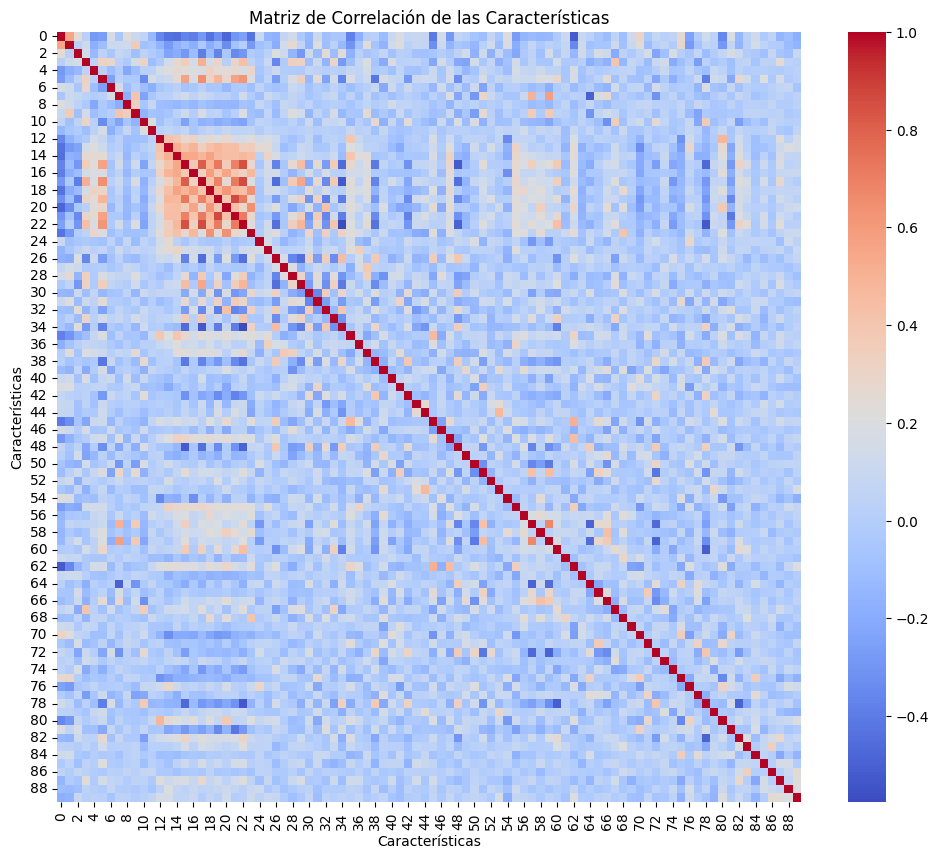

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación de X_train
correlation_matrix = np.corrcoef(X_train, rowvar=False)

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de las Características')
plt.xlabel('Características')
plt.ylabel('Características')
plt.show()





####Distribución de las etiquetas.
Con el fin de ver la frecuencia de las etiquetas (año de publicación) podemos construir una gráfica de barras.

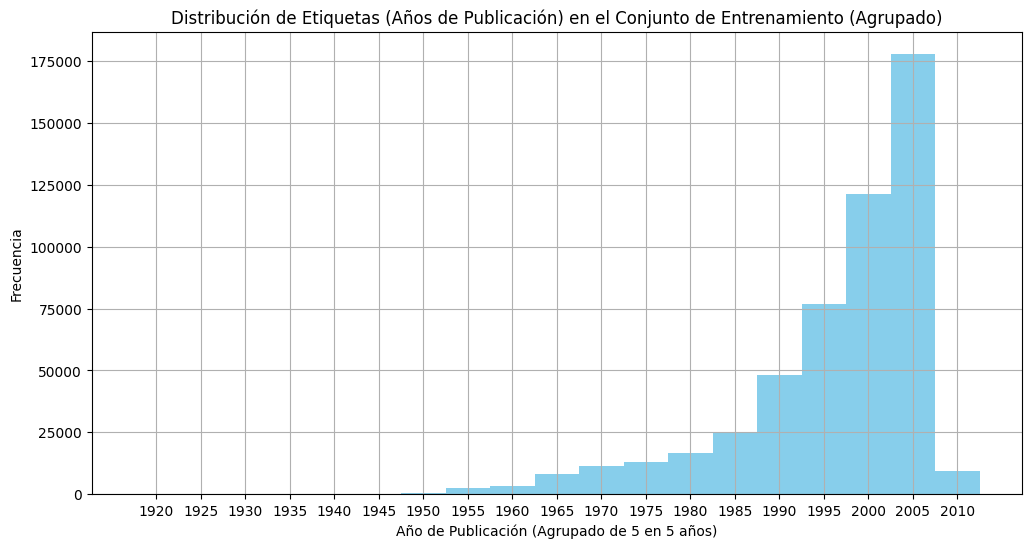

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener la frecuencia de cada año de publicación en y_train
unique_years, year_counts = np.unique(y_train, return_counts=True)

# Agrupar los años en intervalos de 5 años
interval = 5
grouped_years = np.arange(1920, 2012, interval)
grouped_counts = np.zeros(len(grouped_years))

# Contar la frecuencia de cada intervalo de 5 años
for i in range(len(grouped_years)):
    start_year = grouped_years[i]
    end_year = start_year + interval
    indices = np.where((unique_years >= start_year) & (unique_years < end_year))[0]
    grouped_counts[i] = year_counts[indices].sum()

# Crear una gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(grouped_years, grouped_counts, width=interval, color='skyblue')
plt.title('Distribución de Etiquetas (Años de Publicación) en el Conjunto de Entrenamiento (Agrupado)')
plt.xlabel('Año de Publicación (Agrupado de 5 en 5 años)')
plt.ylabel('Frecuencia')
plt.xticks(grouped_years)
plt.grid(True)

# Mostrar la gráfica
plt.show()



Observando la gráfica extraemos una característica importante de nuestro conjunto de datos:

Entre los años 20 y 70 la cantidad de datos (canciones con sus características y año de publicación) es más o menos constante
y relativamente pequeña en cuanto a frecuencia. A partir de ahí, dicha frecuencia va aumentando exponencialmente entre los años 70 hasta el 2008 aproximadamente.

### <font color='blue'>3.2 Preprocesado de datos.

####Selección/extracción de características.

En el proceso de selección/extracción de características, identificamos las características más relevantes para nuestro problema de predicción del año de publicación de canciones. Esto implica elegir un subconjunto de características que mejor capturen la información necesaria para el modelo de predicción. En nuestro caso, podríamos seleccionar características basadas en su correlación con el año de publicación o usar técnicas de reducción de dimensionalidad para extraer características más representativas. A continuación, implementamos la selección de características utilizando el método SelectKBest de scikit-learn, que nos permite seleccionar un número específico de las mejores características basadas en pruebas estadísticas como la correlación F.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

def seleccion(X_train, y_train, X_test, percentile_value=75):
    # Calcular el número de características que representan el porcentaje especificado del total
    k = int(X_train.shape[1] * percentile_value / 100)

    # Seleccionar el porcentaje especificado de las mejores características basadas en la prueba de correlación F
    selector = SelectKBest(score_func=f_regression, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)  # Aplicar la misma selección al conjunto de prueba


    return X_train_selected, X_test_selected

#X_train_preprocessed, X_test_preprocessed = seleccion(X_train, y_train, X_test, 75)



####Escalado de características

El escalado de características es útil porque puede ayudar a mejorar el rendimiento de los modelos al estandarizar o normalizar las características, lo que puede facilitar la convergencia del algoritmo y mejorar la interpretación de los coeficientes del modelo.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def escalar(X_train, X_test, escalado='standard'):
    """
    Escala las características de entrenamiento y prueba utilizando StandardScaler o MinMaxScaler.

    Parámetros:
    X_train (array-like): Conjunto de características de entrenamiento.
    X_test (array-like): Conjunto de características de prueba.
    escalado (str): Tipo de escalado a utilizar. Puede ser 'standard' para StandardScaler o 'minmax' para MinMaxScaler.

    Retorna:
    X_train_scaled (array-like): Características de entrenamiento escaladas.
    X_test_scaled (array-like): Características de prueba escaladas.
    """

    if escalado == 'standard':
        # Inicializar el escalador StandardScaler
        scaler = StandardScaler()
    elif escalado == 'minmax':
        # Inicializar el escalador MinMaxScaler
        scaler = MinMaxScaler()
    else:
        raise ValueError("El parámetro 'escalado' debe ser 'standard' o 'minmax'.")

    # Ajustar el escalador a los datos de entrenamiento y transformar los datos de entrenamiento
    X_train_scaled = scaler.fit_transform(X_train)

    # Transformar los datos de prueba utilizando los mismos parámetros de escala que se usaron en los datos de entrenamiento
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled


####Estratificación de los datos con el objetivo del equilibrado de las clases.


Al observar la distribución de las etiquetas de los años de publicación en el conjunto de datos, se identificó un claro desequilibrio en las frecuencias, especialmente en el rango de los años 1922 a 1975 aproximadamente. Este desequilibrio podría influir negativamente en el rendimiento de los modelos de regresión, ya que pueden estar sesgados hacia las clases más frecuentes.

Por lo tanto, se decidió implementar un preprocesamiento que estratificara los datos con el objetivo de equilibrar las clases tanto como fuera posible. La estratificación implica dividir el conjunto de datos en subconjuntos homogéneos con respecto a la variable objetivo, de modo que cada subconjunto tenga una proporción similar de muestras para cada clase.

Al reducir el desequilibrio en las frecuencias de las clases, se espera mejorar la capacidad predictiva de los modelos y evitar posibles sesgos en las predicciones hacia las clases más representadas. Esto puede conducir a una mayor generalización del modelo y a resultados más confiables en la predicción del año de publicación de las canciones.

In [ ]:
from sklearn.utils import resample

def muestreo_estratificado(X_train, y_train, factor=1):
    # Calcular la media de las frecuencias de las etiquetas
    freq_media = int(len(y_train) / len(np.unique(y_train)))

    # Definir el tamaño objetivo de la muestra
    tamano_objetivo = int(factor * freq_media)

    # Concatenar las características y las etiquetas para realizar el muestreo estratificado
    all_data = np.column_stack((y_train, X_train))  # Etiquetas primero, características después

    # Muestreo estratificado para equilibrar la frecuencia de las etiquetas
    sampled_data = []
    for year in range(1922, 2012):
        year_samples = all_data[all_data[:, 0] == year]  # Usar la primera columna para las etiquetas
        if len(year_samples) >= tamano_objetivo:
            sampled_year = resample(year_samples, n_samples=tamano_objetivo, replace=True, random_state=42)
            sampled_data.append(sampled_year)
        else:
            sampled_data.append(year_samples)  # Añadir todas las muestras si no llegan al tamaño objetivo

    # Concatenar todos los arrays muestreados en un solo array
    sampled_data = np.concatenate(sampled_data)

    # Separar características y etiquetas del conjunto de datos muestreado
    y_train = sampled_data[:, 0]   # Todas las filas, solo la primera columna (etiqueta)
    X_train = sampled_data[:, 1:]  # Todas las filas, todas las columnas excepto la primera (etiqueta)


    return X_train, y_train



####Reducción de Dimensionalidad mediante pca


El preprocesamiento de reducción de dimensionalidad mediante PCA (Análisis de Componentes Principales) es una estrategia crucial cuando se trabaja con conjuntos de datos grandes como YearPredictionMSD. Dado que este conjunto de datos contiene un gran número de características (90 valores reales por ejemplo), la dimensionalidad puede ser un factor significativo en el tiempo de cómputo necesario para entrenar y validar modelos de aprendizaje automático.

PCA es una técnica que permite reducir la dimensionalidad de los datos al proyectarlos en un espacio de características de menor dimensión mientras se retiene la mayor cantidad posible de la variabilidad de los datos. Al preservar la mayoría de la información importante en un número menor de características, PCA puede ayudar a acelerar significativamente el tiempo de entrenamiento de los modelos sin sacrificar en gran medida el rendimiento predictivo.

Por lo tanto, al aplicar PCA al conjunto de datos YearPredictionMSD, se espera poder reducir la complejidad del problema y mejorar la eficiencia computacional, lo que permitirá una experimentación más rápida con diferentes modelos y configuraciones. Esto es especialmente beneficioso en conjuntos de datos grandes donde el tiempo de cómputo puede ser prohibitivo.

In [ ]:
from sklearn.decomposition import PCA

def reduccion_pca(X_train, X_test, variance_ratio=0.95):
    """
    Aplica reducción de dimensionalidad mediante PCA a los conjuntos de datos de entrenamiento y prueba,
    manteniendo un porcentaje específico de la varianza explicada.

    Parámetros:
    - X_train: numpy array, conjunto de datos de entrenamiento.
    - X_test: numpy array, conjunto de datos de prueba.
    - variance_ratio: float, porcentaje de varianza explicada deseada.

    Retorna:
    - X_train_pca: numpy array, conjunto de datos de entrenamiento transformado por PCA.
    - X_test_pca: numpy array, conjunto de datos de prueba transformado por PCA.
    """

    # Inicializar el objeto PCA
    pca = PCA(n_components=variance_ratio)

    # Aplicar PCA al conjunto de datos de entrenamiento y transformar los conjuntos de datos de entrenamiento y prueba
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    return X_train_pca, X_test_pca


####Reducción del conjunto de datos manteniendo la distribución de frecuencias de etiquetas


En contraste con la estratificación, donde se busca equilibrar las frecuencias de las etiquetas, la reducción del conjunto de datos manteniendo la distribución de frecuencias de etiquetas implica preservar los desequilibrios existentes entre las clases. Este enfoque se utiliza cuando se desea que los modelos de aprendizaje automático entrenados reflejen con precisión la realidad del conjunto de datos original, donde ciertas clases pueden ser naturalmente más frecuentes que otras.

In [ ]:
from sklearn.utils import resample

def reduccion_manteniendo_distribucion(X_train, y_train, reduction_factor=1.0):
    """
    Reduce el tamaño del conjunto de características de entrenamiento manteniendo la distribución de frecuencia de las etiquetas.

    Parámetros:
    - X_train: numpy array, conjunto de características de entrenamiento.
    - y_train: numpy array, conjunto de etiquetas de entrenamiento.
    - reduction_factor: float, factor de reducción del conjunto de características. Un valor entre 0 y 1.
                        1 mantiene el tamaño original del conjunto de características.
                        Menores valores reducen el tamaño del conjunto de características intentando mantener la distribución.

    Retorna:
    - X_train_reduced: numpy array, conjunto de características de entrenamiento reducido.
    - y_train_reduced: numpy array, conjunto de etiquetas de entrenamiento.
    """

    # Calcular el tamaño deseado del nuevo conjunto de características
    size = int(len(X_train) * reduction_factor)

    # Concatenar características y etiquetas para realizar el muestreo manteniendo la distribución
    all_data = np.column_stack((y_train, X_train))  # Etiquetas primero, características después

    # Muestrear el conjunto de características manteniendo la distribución de frecuencia de las etiquetas
    sampled_data = []
    unique_labels = np.unique(y_train)
    for label in unique_labels:
        label_samples = all_data[all_data[:, 0] == label]  # Usar la primera columna para las etiquetas
        if len(label_samples) >= size:
            sampled_label = resample(label_samples, n_samples=size, replace=False, random_state=42)
        else:
            sampled_label = resample(label_samples, n_samples=size, replace=True, random_state=42)
        sampled_data.append(sampled_label)

    # Concatenar los arrays muestreados en un solo array
    sampled_data = np.concatenate(sampled_data)

    # Separar características y etiquetas del conjunto de datos muestreado
    y_train_reduced = sampled_data[:, 0]   # Todas las filas, solo la primera columna (etiqueta)
    X_train_reduced = sampled_data[:, 1:]  # Todas las filas, todas las columnas excepto la primera (etiqueta)

    return X_train_reduced, y_train_reduced


### <font color='blue'>3.3 Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.

####Protocolo de Validación Experimental:
Para la validación experimental, dividiremos nuestro conjunto de datos en dos partes principales: un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento consistirá en los datos preprocesados. Por otro lado, el conjunto de prueba permanecerá sin modificar y se utilizará para evaluar el rendimiento final del modelo. Lo único que necesitamos modificar del conjunto de test es aplicar el mismo preprocesado al conjunto de test, obviamente sin ningun tipo de snooping, para mantener la consistencia.


####Definición de Métricas de Evaluación

En esta sección, seleccionaremos varias métricas de evaluación adecuadas para medir el rendimiento de nuestros modelos de regresión. A continuación, una breve explicación de algunas de estas métricas:

- Error Cuadrático Medio (Mean Squared Error - MSE):
El MSE calcula la diferencia cuadrada promedio entre las predicciones del modelo y los valores reales. Es una medida de la dispersión de los errores y penaliza los errores más grandes.
- Raíz del Error Cuadrático Medio (Root Mean Squared Error - RMSE):
El RMSE es la raíz cuadrada del MSE y proporciona una medida de la dispersión de los errores en la misma unidad que la variable objetivo.
- Coeficiente de Determinación (R-squared):
El coeficiente R-squared indica la proporción de la varianza en la variable objetivo que es explicada por el modelo. Un valor cercano a 1 indica un buen ajuste del modelo a los datos.
- Error Absoluto Medio (Mean Absolute Error - MAE):
El MAE calcula la diferencia absoluta promedio entre las predicciones del modelo y los valores reales. Proporciona una medida de la magnitud promedio de los errores.
A continuación, implementaremos una función para calcular estas métricas a partir de un modelo entrenado y un conjunto de datos de prueba.

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(model, X_test, y_test):
    # Predicciones del modelo
    y_pred = model.predict(X_test)

    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Devolver métricas
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R-squared': r2}


### <font color='blue'>3.4 Elección de algoritmos de aprendizaje

####Regresión Lineal

La Regresión Lineal busca establecer una relación lineal entre las características sonoras de las canciones y el año de publicación. Utiliza un modelo que asume una relación lineal entre las características y la variable objetivo, donde los coeficientes de las características determinan la importancia de cada una en la predicción del año de la canción.

#####Ventajas:

- Interpretación: La Regresión Lineal proporciona coeficientes que pueden interpretarse directamente como la contribución de cada característica a la predicción del año de la canción.
- Simplicidad: Es un modelo simple y fácil de entender, lo que facilita su interpretación y su aplicación en conjuntos de datos de tamaño moderado.
- Rápido entrenamiento y predicción: Debido a su simplicidad, el entrenamiento y la predicción con Regresión Lineal suelen ser rápidos, especialmente en conjuntos de datos grandes.

#####Desventajas:

- Limitación en la complejidad del modelo: La Regresión Lineal asume una relación lineal entre las características y la variable objetivo, lo que puede no capturar relaciones no lineales en los datos.
- Sensibilidad a valores atípicos: La Regresión Lineal puede ser sensible a valores atípicos en los datos, lo que puede afectar negativamente su rendimiento si no se manejan adecuadamente.
- Limitación en la captura de interacciones entre características: Al ser lineal, la Regresión Lineal puede tener dificultades para capturar interacciones complejas entre las características, lo que puede limitar su capacidad predictiva en conjuntos de datos con características altamente correlacionadas o interdependientes.

#####¿Por qué regresión lineal?

La Regresión Lineal es adecuada para nuestro problema de regresión en YearPredictionMSD porque nos permite establecer una relación directa y fácilmente interpretable entre las características sonoras de las canciones y el año de publicación. Dado que estamos tratando con un conjunto de datos que contiene características numéricas, la Regresión Lineal es una opción natural para modelar esta relación. Además, su simplicidad y eficiencia en el entrenamiento y la predicción son ventajas importantes en conjuntos de datos grandes como el nuestro. Sin embargo, debemos tener en cuenta sus limitaciones en la captura de relaciones no lineales y la sensibilidad a valores atípicos.

####Gradient Boosting

Gradient Boosting es una técnica de aprendizaje automático que busca construir un modelo predictivo combinando múltiples árboles de decisión de manera secuencial. Cada árbol de decisión se entrena para corregir los errores del modelo anterior, lo que permite mejorar gradualmente la capacidad predictiva del conjunto.

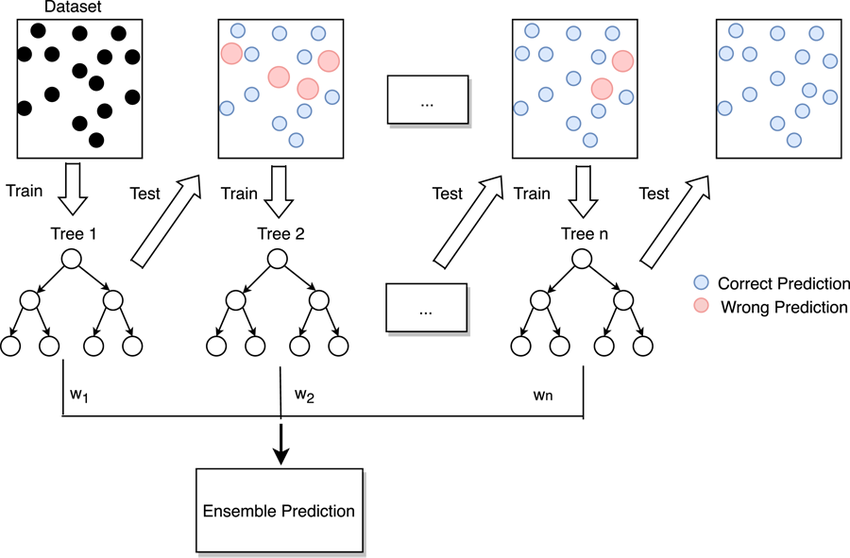

#####Ventajas:

- Alta precisión predictiva: Gradient Boosting es conocido por proporcionar resultados altamente precisos en una variedad de conjuntos de datos y problemas, incluidos aquellos con características no lineales y relaciones complejas.
- Manejo automático de características: Puede manejar automáticamente características numéricas y categóricas, así como manejar valores faltantes en los datos.
- Robustez frente a sobreajuste: Al construir árboles de decisión poco profundos secuenciales, Gradient Boosting es menos propenso al sobreajuste que otros modelos complejos como Redes Neuronales o Support Vector Machines.

#####Desventajas:

- Sensibilidad a hiperparámetros: El rendimiento de Gradient Boosting depende en gran medida de la selección de hiperparámetros, como la tasa de aprendizaje, la profundidad del árbol y el número de árboles en el ensamble. En consecuencia, puede requerir un ajuste cuidadoso de los hiperparámetros.
- Tiempo de entrenamiento y complejidad computacional: El entrenamiento de Gradient Boosting puede ser más lento en comparación con otros modelos más simples debido a la construcción secuencial de árboles de decisión y la búsqueda de los mejores ajustes en cada paso.
- Menos interpretable que modelos simples: Aunque Gradient Boosting puede proporcionar predicciones precisas, la interpretación del modelo puede ser más difícil en comparación con modelos más simples como la Regresión Lineal, debido a la naturaleza compleja del ensamble de árboles.

#####¿Por qué GBR?
El Gradient Boosting Regressor es adecuado para nuestro problema de regresión en YearPredictionMSD debido a su capacidad para modelar relaciones complejas entre las características acústicas de las canciones y el año de publicación. Su capacidad para manejar automáticamente características y su robustez frente al sobreajuste lo convierten en una opción prometedora para este conjunto de datos. Sin embargo, debemos tener en cuenta el tiempo de entrenamiento potencialmente más largo y la sensibilidad a los hiperparámetros.


####AdaBoostRegressor

AdaBoostRegressor es un algoritmo de ensemble que se enfoca en mejorar la precisión predictiva al asignar pesos a las instancias de datos y ajustar iterativamente modelos de aprendizaje débiles en función de estos pesos. El algoritmo se centra en las instancias que son más difíciles de predecir y da más peso a las instancias mal clasificadas en cada iteración.

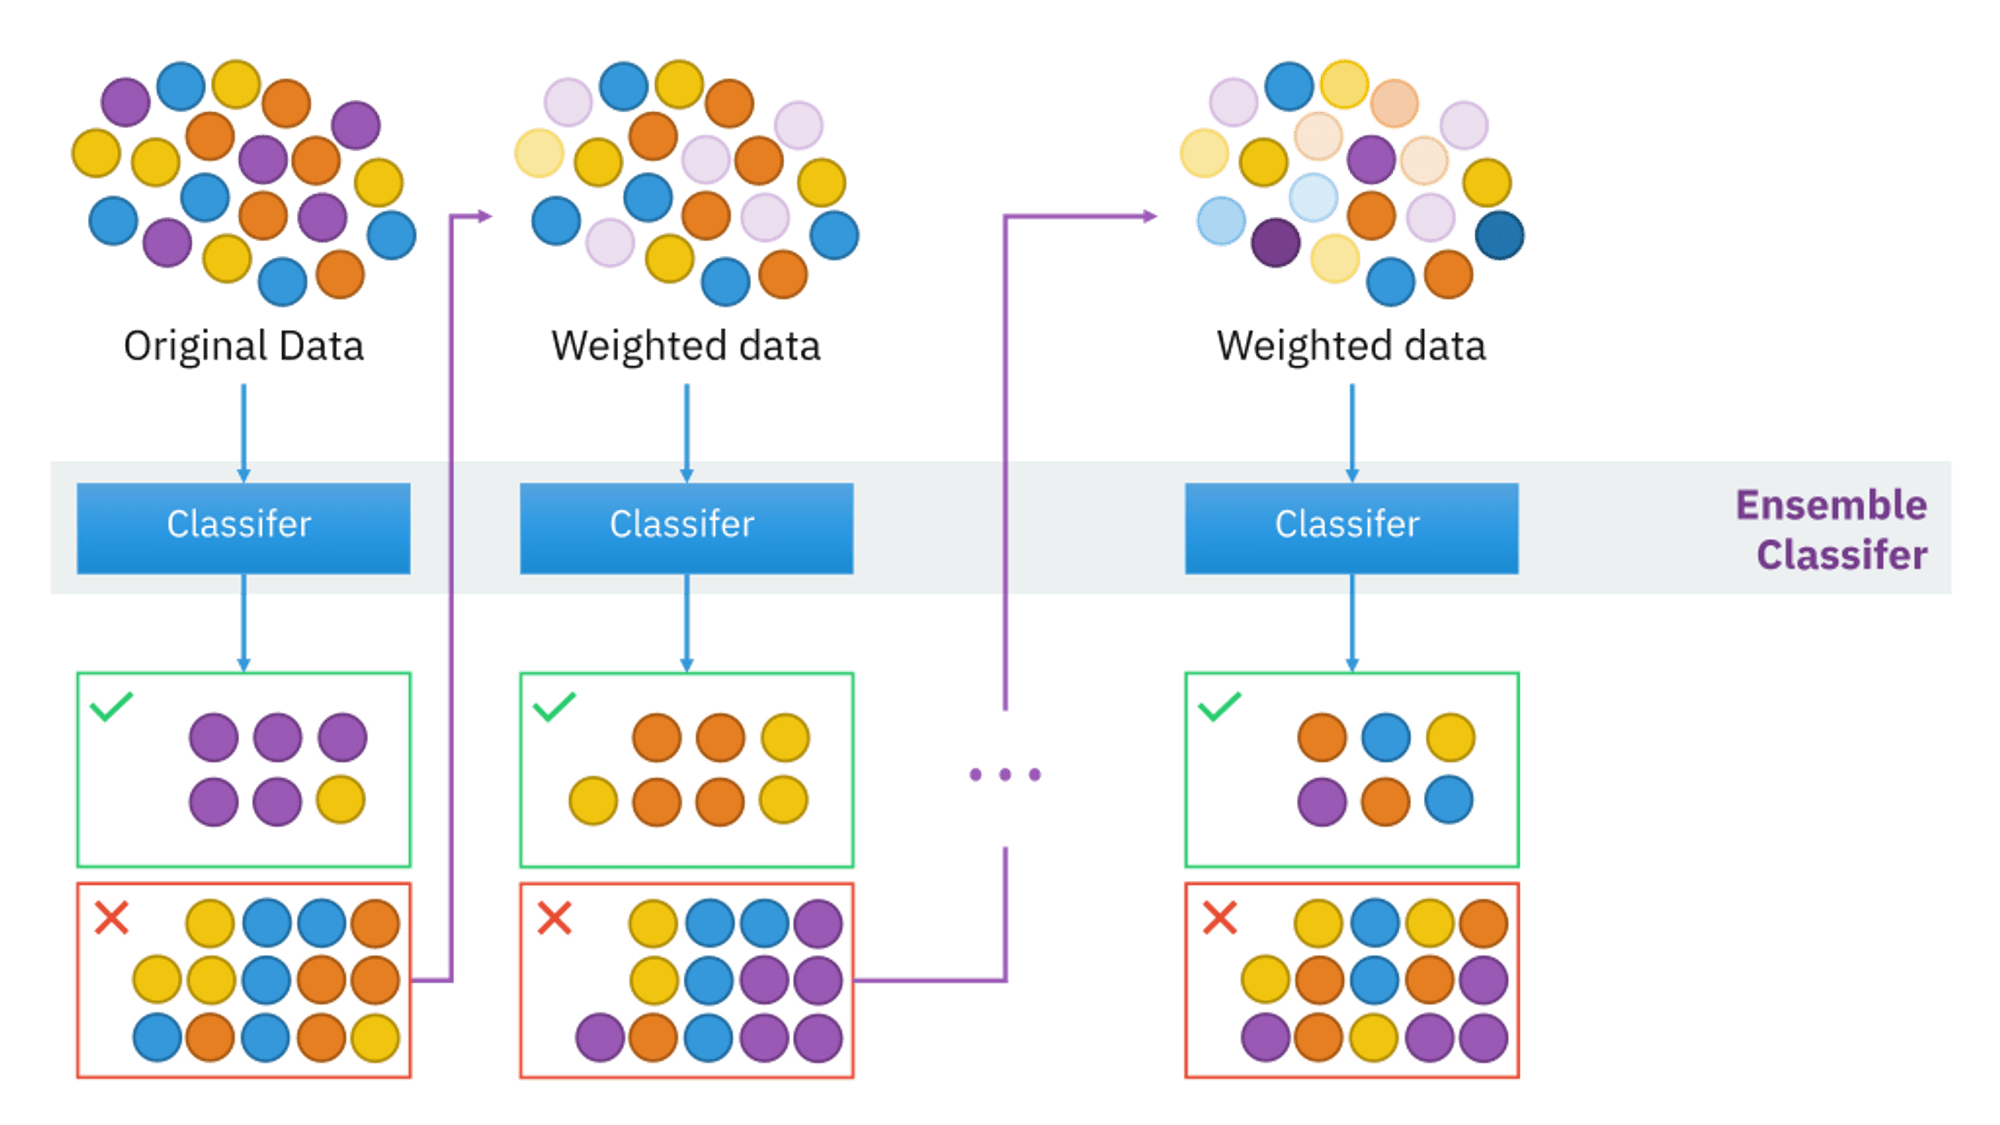

#####Ventajas:

- Adaptabilidad a modelos débiles: AdaBoostRegressor puede funcionar bien con modelos de base simples, como árboles de decisión poco profundos, lo que lo hace eficaz para problemas de regresión.
- Menos propenso al sobreajuste: Al centrarse en las instancias más difíciles de predecir, AdaBoostRegressor tiende a ser menos propenso al sobreajuste en comparación con otros métodos de ensemble.
- Buen rendimiento en la práctica: AdaBoostRegressor ha demostrado ser efectivo en una variedad de problemas de regresión, incluso en conjuntos de datos con características no lineales y ruido.

#####Desventajas:

- Sensibilidad a valores atípicos y ruido: AdaBoostRegressor puede ser sensible a valores atípicos y ruido en los datos, lo que puede afectar negativamente su rendimiento si no se manejan adecuadamente.
- Requiere ajuste de hiperparámetros: Al igual que otros métodos de ensemble, AdaBoostRegressor requiere ajuste de hiperparámetros, como el número de estimadores y la tasa de aprendizaje, para lograr el mejor rendimiento.
- Menos interpretable que modelos simples: Aunque AdaBoostRegressor puede proporcionar resultados precisos, la interpretación del modelo puede ser más difícil debido a la combinación de múltiples modelos de base.

#####¿Por qué AdaBoost?
AdaBoost es adecuado para el problema de regresión debido a su capacidad para adaptarse a modelos débiles sucesivamente y modelar relaciones complejas entre las características y la variable objetivo, lo que lo hace efectivo en conjuntos de datos con características complejas y no lineales. Sin embargo, se debe tener en cuenta su sensibilidad al ruido y a los valores atípicos, así como su costo computacional.

### <font color='blue'>3.5 Selección y estimación de valores para hiperparámetros.

####Regresión Lineal

La Regresión Lineal es un modelo simple pero efectivo que asume una relación lineal entre las características de entrada y la variable objetivo. Los principales hiperparámetros a considerar son:

#####Variantes (regularización):
- Ridge Regression (Regularización L2): Penaliza los coeficientes grandes, lo que puede ayudar a reducir el sobreajuste.
- Lasso Regression (Regularización L1): Fuerza algunos coeficientes a cero, facilitando la selección de características.

#####Parámetro de Regularización:
Controla la fuerza de la regularización. Valores más altos aumentan la regularización, útil para prevenir el sobreajuste.

Para seleccionar los valores óptimos de estos hiperparámetros, utilizaremos la técnica de búsqueda en la malla (Grid Search). Evaluaremos el rendimiento del modelo con diferentes combinaciones de hiperparámetros y seleccionaremos aquellos que maximicen una métrica de evaluación, como el error cuadrático medio (Mean Squared Error) o el coeficiente de determinación (R-squared).


####Gradient Boosting Regressor:


Los hiperparámetros clave son:

- Tasa de Aprendizaje (Learning Rate): Controla la contribución de cada árbol al modelo final.
- Número de Estimadores (n_estimators): Especifica el número total de árboles de decisión en el ensamble.
- Profundidad Máxima del Árbol (Max Depth): Define la profundidad máxima de cada árbol en el ensamble.
- Submuestra de Características (Subsample): Determina la fracción de características a considerar al construir cada árbol.
- Fracción de Características a Considerar en Cada División (Max Features): Controla la cantidad de características a considerar cuando se busca la mejor división en cada nodo del árbol.
- Mínimo de Muestras en la Hoja (Min Samples Leaf): Especifica el número mínimo de muestras requeridas para estar en una hoja del árbol.


Utilizaremos la técnica de búsqueda en la malla (Grid Search) para seleccionar los valores óptimos de estos hiperparámetros.


####AdaBoost Regressor:

Los hiperparámetros clave son:

- Número de Estimadores (n_estimators): Especifica el número total de modelos de base que se ajustarán de forma secuencial en el proceso de boosting.
- Tasa de Aprendizaje (Learning Rate): Controla la contribución de cada modelo de base al modelo final.
- Modelo de Base (Base Estimator): Especifica el tipo de modelo de base a utilizar en cada iteración del boosting.
- Parámetros del Modelo de Base: Los hiperparámetros específicos del modelo de base, como la profundidad máxima del árbol en el caso de usar árboles de decisión como modelos de base.

Utilizaremos la técnica de búsqueda en la malla (Grid Search) para seleccionar los valores óptimos de estos hiperparámetros.

### <font color='blue'>3.6 Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

Durante el proceso de entrenamiento y análisis de los modelos de regresión, se exploraron diversas configuraciones de preprocesamiento para mejorar el rendimiento predictivo. Aunque experimentamos con estratificación de clases y otras técnicas, encontramos que en el contexto de la regresión, estos enfoques adicionales resultaron contraproducentes. Sin embargo, su aplicación fue esencial para facilitar la búsqueda de los mejores parámetros, permitiendo así una optimización efectiva en un tiempo realista. A continuación, se presentarán ejemplos concretos que ilustran estos hallazgos.

####Regresión Lineal

Métricas del modelo de Regresión Lineal:
MSE: 90.32904742266635
RMSE: 9.504159480073255
MAE: 6.793537045673091
R-squared: 0.23296518238247976
Tiempo de entrenamiento: 6.65 segundos


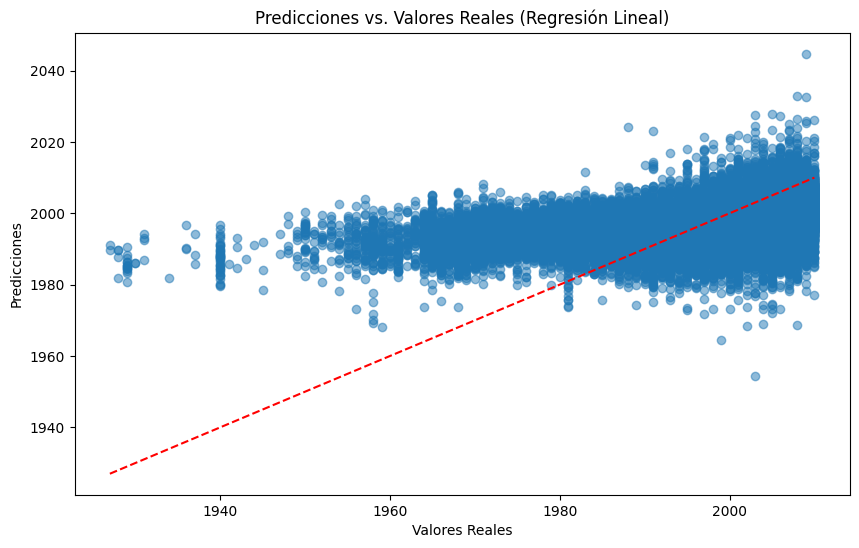

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import time



# Inicializar el modelo de Regresión Lineal
linear_regression_model = LinearRegression()

# Iniciar temporizador para el entrenamiento
start_time_training = time.time()

# Entrenar el modelo
linear_regression_model.fit(X_train, y_train)

# Calcular el tiempo de entrenamiento
training_time = time.time() - start_time_training

# Evaluación del modelo
linear_regression_metrics = evaluate_model(linear_regression_model, X_test, y_test)

# Salida de métricas del modelo y tiempo de entrenamiento
print("Métricas del modelo de Regresión Lineal:")
for metric, value in linear_regression_metrics.items():
    print(f"{metric}: {value}")
print("Tiempo de entrenamiento: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_model.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Regresión Lineal)')
plt.show()



####Regresión Ridge

Métricas del mejor modelo de Regresión Ridge:
MSE: 90.32905383687586
RMSE: 9.504159817515479
MAE: 6.793539869403544
R-squared: 0.23296512791581414
Tiempo total de GridSearchCV: 25.10 segundos
Tiempo de entrenamiento del mejor modelo: 0.02 segundos


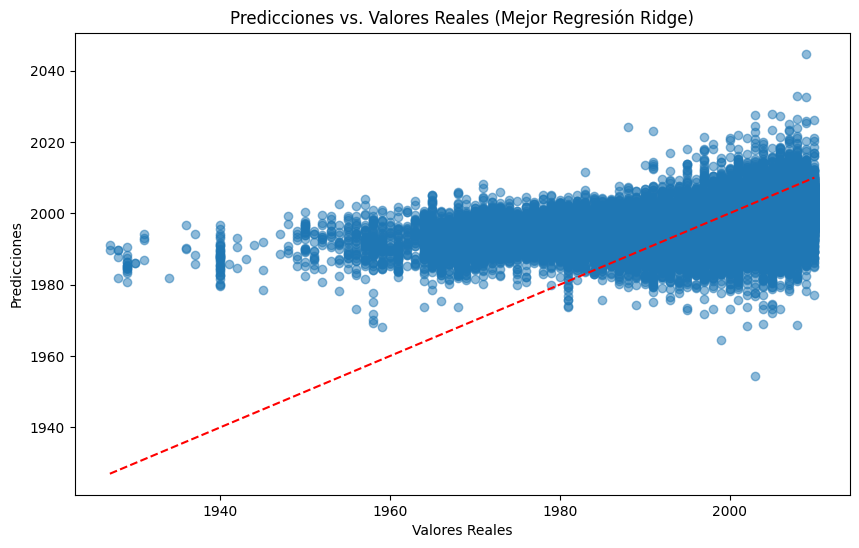

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import time

# Definir los parámetros a buscar en la malla para Ridge
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el modelo de Ridge
ridge_model = Ridge()

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

# Inicializar GridSearchCV para Regresión Ridge
ridge_grid_search = GridSearchCV(ridge_model, params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Calcular el tiempo de GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Mejor modelo encontrado
best_ridge_model = ridge_grid_search.best_estimator_

# Iniciar temporizador para el entrenamiento del mejor modelo
start_time_training = time.time()

# Evaluación del mejor modelo
best_ridge_metrics = evaluate_model(best_ridge_model, X_test, y_test)

# Calcular el tiempo de entrenamiento del mejor modelo
training_time = time.time() - start_time_training

# Salida de métricas del mejor modelo y tiempos
print("Métricas del mejor modelo de Regresión Ridge:")
for metric, value in best_ridge_metrics.items():
    print(f"{metric}: {value}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del mejor modelo: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales con el mejor modelo de Regresión Ridge
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_ridge_model.predict(X_test), alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Regresión Ridge)')
plt.show()



####Regresión Lasso
(Precaución, no ejecutar, tarda mucho)

Métricas del mejor modelo de Regresión Lasso:
MSE: 90.33021143523847
RMSE: 9.50422071688355
MAE: 6.7935986493286675
R-squared: 0.23295529809612403
Tiempo total de GridSearchCV: 750.06 segundos
Tiempo de entrenamiento del mejor modelo: 41.78 segundos


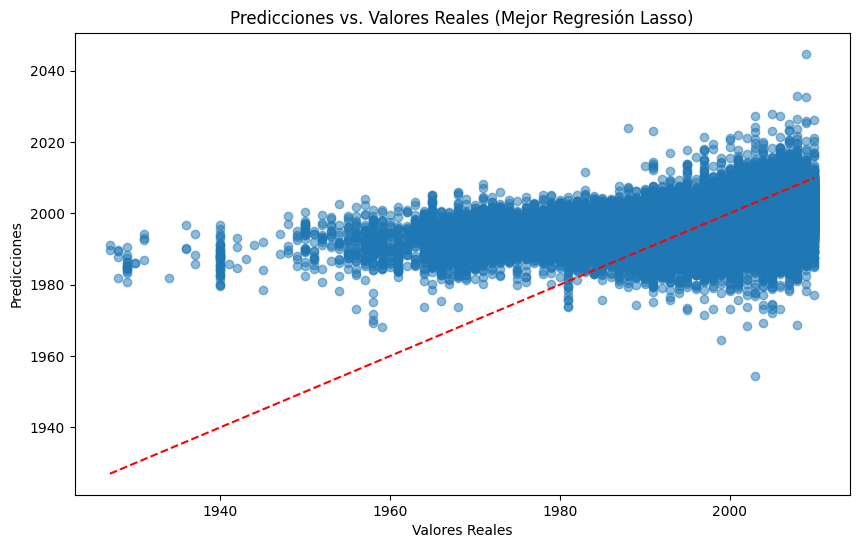

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros a buscar en la malla para Lasso
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Inicializar el modelo de Lasso
lasso_model = Lasso()

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

# Inicializar GridSearchCV para Regresión Lasso
lasso_grid_search = GridSearchCV(lasso_model, params, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Calcular el tiempo de GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Mejor modelo encontrado
best_lasso_model = lasso_grid_search.best_estimator_

# Iniciar temporizador para el entrenamiento del mejor modelo
start_time_training = time.time()

# Entrenar el mejor modelo
best_lasso_model.fit(X_train, y_train)

# Calcular las predicciones del mejor modelo
y_pred = best_lasso_model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular la raíz del error cuadrático medio (RMSE)
rmse = np.sqrt(mse)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

# Calcular el tiempo de entrenamiento del mejor modelo
training_time = time.time() - start_time_training

# Salida de todas las métricas del mejor modelo y tiempos
print("Métricas del mejor modelo de Regresión Lasso:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del mejor modelo: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales con el mejor modelo de Regresión Lasso
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Regresión Lasso)')
plt.show()



El análisis de los modelos lineales (Regresión Lineal estándar, Ridge y Lasso) revela resultados consistentes entre ellos. Las métricas de evaluación, que incluyen el Error Cuadrático Medio (MSE), la Raíz del Error Cuadrático Medio (RMSE), el Error Absoluto Medio (MAE) y el Coeficiente de Determinación (R-squared), muestran valores muy similares en todos los casos.

Estas métricas indican que los modelos tienen dificultades para capturar las relaciones complejas entre las características de las canciones y el año de publicación. La tendencia general de los modelos es predecir valores que se acercan a la media, lo que significa que las canciones tienden a ser predichas como más recientes de lo que realmente son en el caso de las canciones antiguas, y viceversa en el caso de las canciones más recientes.

Este fenómeno puede deberse a que la relación entre las características sonoras y el año de publicación no es puramente lineal y puede estar influenciada por factores no considerados en el modelo, como las tendencias culturales y sociales. Además, es posible que la alta dimensionalidad de los datos y la multicolinealidad entre las características dificulten la capacidad de los modelos lineales para capturar estas relaciones de manera efectiva.

La consistencia en los resultados entre los modelos lineales sugiere que el fenómeno observado no se limita a un modelo específico, sino que es inherente a la naturaleza del problema de regresión en sí mismo. Esto implica que la mejora en la capacidad predictiva requerirá enfoques más sofisticados, como modelos no lineales o técnicas de ingeniería de características más avanzadas.

####Gradient Boosting regressor
(ejecutar esto si se quiere comprobar que la implementación funciona, si no pasar a la siguiente implementación)

Equilibrando las clases para grid search

Se aplicó un enfoque inicial que combinaba muestreo estratificado, selección de características y reducción de dimensionalidad con PCA para realizar la búsqueda de los mejores parámetros de manera eficiente. Esto permitió obtener los mejores parámetros en un tiempo realista y entrenar el modelo final con el conjunto de datos completo sin preprocesamiento adicional.

Este enfoque refleja una estrategia prudente para abordar problemas de modelado con grandes conjuntos de datos. Al combinar técnicas de preprocesamiento con la búsqueda eficiente de parámetros, se logra obtener un modelo final con un rendimiento óptimo en un tiempo razonable, manteniendo la integridad de los datos originales. Aunque el Gradient Boosting Regressor mostró una mejora modesta en comparación con los modelos lineales, este enfoque permitió encontrar un equilibrio entre la exhaustividad de la búsqueda de parámetros y el tiempo computacional requerido.

Forma de las características para grid_search: (4271, 4)
Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'subsample': 0.8}
Forma de las características para entrenamiento final: (515345, 23)

Métricas del mejor modelo de Gradient Boosting Regressor:
MSE: 106.83411878694056
RMSE: 10.336059151675776
MAE: 7.646672961520222
R-squared: 0.09281132529128389
Tiempo total de GridSearchCV: 106.95 segundos
Tiempo de entrenamiento del modelo final: 152.18 segundos


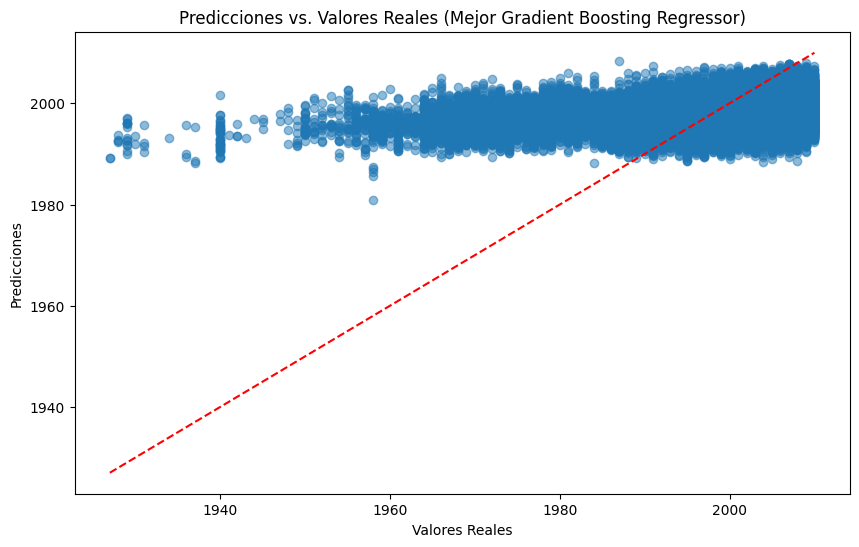

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

# Aplicar muestreo estratificado
X_train_strat, y_train_strat = muestreo_estratificado(X_train, y_train, factor=0.01)

# Preprocesamiento de selección de características
X_train_selected, X_test_selected = seleccion(X_train_strat, y_train_strat, X_test)

# Reducción de dimensionalidad con PCA al 75%
X_train_pca, X_test_pca = reduccion_pca(X_train_selected, X_test_selected, 0.75)

print("Forma de las características para grid_search:", X_train_pca.shape)

# Definir los hiperparámetros para el Gradient Boosting Regressor
params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2]
}

# Inicializar GridSearchCV para Gradient Boosting Regressor con los parámetros y el modelo
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

grid_search = GridSearchCV(gradient_boosting_model, params, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de los mejores parámetros utilizando los datos preprocesados
grid_search.fit(X_train_pca, y_train_strat)

# Calcular el tiempo de GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

# Entrenar el modelo final con todos los datos utilizando los mejores parámetros encontrados
final_gradient_boosting_model = GradientBoostingRegressor(**best_params, random_state=42)

# Aplicar muestreo estratificado
#X_train_strat_final, y_train_strat_final = muestreo_estratificado(X_train, y_train, factor=1.5)

# Preprocesamiento de selección de características
#X_train_selected_final, X_test_selected_final = seleccion(X_train, y_train, X_test)

# Reducción de dimensionalidad con PCA al 75%
X_train_pca_final, X_test_pca_final = reduccion_pca(X_train, X_test, 0.95)


print("Forma de las características para entrenamiento final:", X_train_pca_final.shape)

# Iniciar temporizador para el entrenamiento del modelo final
start_time_training = time.time()

final_gradient_boosting_model.fit(X_train_pca_final, y_train)

# Calcular el tiempo de entrenamiento del modelo final
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_gradient_boosting_model.predict(X_test_pca_final)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de Gradient Boosting Regressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Gradient Boosting Regressor)')
plt.show()



(Precaución, no ejecutar, tarda mucho)

Forma de las características para grid_search: (441, 18)
Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100, 'subsample': 0.8}
Forma de las características para entrenamiento final: (515345, 90)

Métricas del mejor modelo de Gradient Boosting Regressor:
MSE: 89.46723540335897
RMSE: 9.458712142958943
MAE: 6.765241864967843
R-squared: 0.2402833136360608
Tiempo total de GridSearchCV: 34.24 segundos
Tiempo de entrenamiento del modelo final: 349.83 segundos


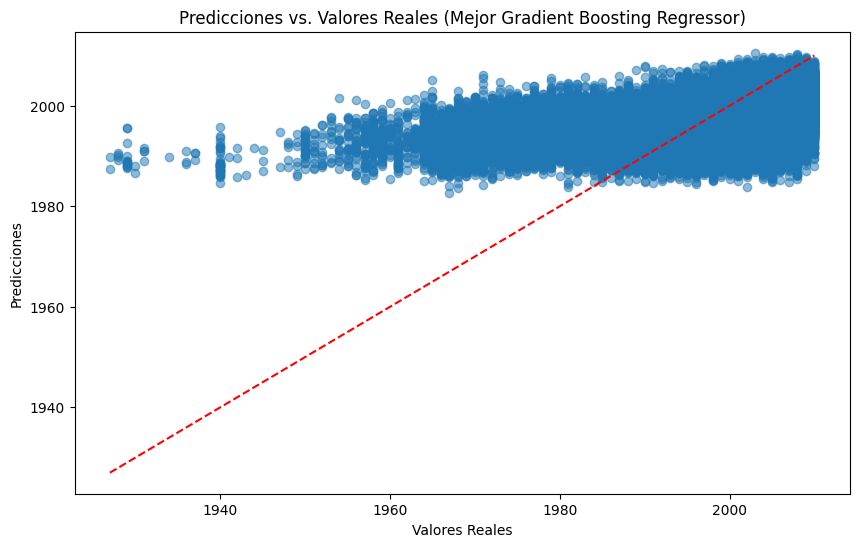

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

# Aplicar muestreo estratificado
X_train_strat, y_train_strat = muestreo_estratificado(X_train, y_train, factor=0.001)

# Preprocesamiento de selección de características
X_train_selected, X_test_selected = seleccion(X_train_strat, y_train_strat, X_test)

# Reducción de dimensionalidad con PCA al 95%
X_train_pca, X_test_pca = reduccion_pca(X_train_selected, X_test_selected, 0.95)

print("Forma de las características para grid_search:", X_train_pca.shape)

# Definir los hiperparámetros para el Gradient Boosting Regressor
params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2]
}

# Inicializar GridSearchCV para Gradient Boosting Regressor con los parámetros y el modelo
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

grid_search = GridSearchCV(gradient_boosting_model, params, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de los mejores parámetros utilizando los datos preprocesados
grid_search.fit(X_train_pca, y_train_strat)

# Calcular el tiempo de GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

# Inicializar el modelo Gradient Boosting Regressor con los mejores parámetros encontrados
final_gradient_boosting_model = GradientBoostingRegressor(**best_params, random_state=42)

print("Forma de las características para entrenamiento final:", X_train.shape)

# Iniciar temporizador para el entrenamiento del modelo final
start_time_training = time.time()

final_gradient_boosting_model.fit(X_train, y_train)

# Calcular el tiempo de entrenamiento del modelo final
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_gradient_boosting_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de Gradient Boosting Regressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Gradient Boosting Regressor)')
plt.show()



Aunque las predicciones no son perfectas, no se observa una tendencia errónea en las predicciones. Esto sugiere que el modelo no está sesgado hacia la media y tiene la capacidad de capturar relaciones más precisas entre las características sonoras y el año de publicación en comparación con los modelos lineales. Sin embargo, la mejora en las métricas de evaluación con respecto a los modelos lineales es modesta.

Entrenando el modelo final aplicandole el estratificado.

(Precaución, no ejecutar, tarda mucho)

Forma de las características para entrenamiento final: (129920, 90)

Métricas del mejor modelo de Gradient Boosting Regressor:
MSE: 164.34940176050293
RMSE: 12.81988306344886
MAE: 10.829033561095612
R-squared: -0.3955833367205768
Tiempo total de GridSearchCV: 34.24 segundos
Tiempo de entrenamiento del modelo final: 73.76 segundos


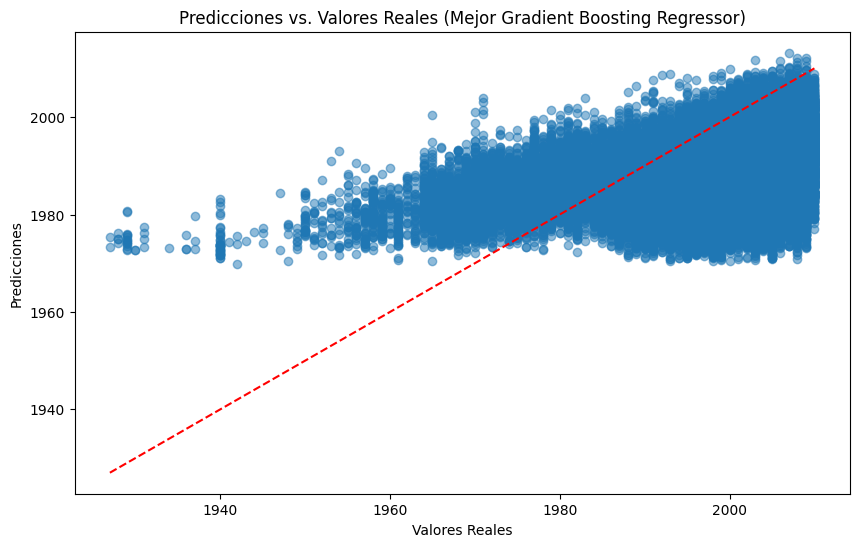

In [ ]:
# Inicializar el modelo Gradient Boosting Regressor con los mejores parámetros encontrados
final_gradient_boosting_model = GradientBoostingRegressor(**best_params, random_state=42)

# Aplicar muestreo estratificado
X_train_strat, y_train_strat = muestreo_estratificado(X_train, y_train, factor=0.5)

print("Forma de las características para entrenamiento final:", X_train_strat.shape)

# Iniciar temporizador para el entrenamiento del modelo final
start_time_training = time.time()

final_gradient_boosting_model.fit(X_train_strat, y_train_strat)

# Calcular el tiempo de entrenamiento del modelo final
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_gradient_boosting_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de Gradient Boosting Regressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Gradient Boosting Regressor)')
plt.show()


Al entrenar el modelo final de Gradient Boosting Regressor con muestreo estratificado, se observó una significativa disminución en el rendimiento en comparación con el modelo sin estratificación. Esto se debe a que el muestreo estratificado reduce el tamaño del conjunto de datos de entrenamiento y puede introducir sesgos si las clases están desequilibradas.

En este caso, el conjunto de datos original tenía una mayor concentración de canciones entre los años 1980 y 2005. Al aplicar el muestreo estratificado, se seleccionó una proporción equilibrada de muestras de cada año, lo que llevó a una representación desproporcionada de instancias de años anteriores en el conjunto de datos reducido.

Esta desproporción puede haber sesgado el modelo hacia la predicción de canciones más antiguas, ya que las instancias de años anteriores tienen una mayor influencia en el entrenamiento del modelo estratificado. Como resultado, las métricas de evaluación, como el MSE, RMSE, MAE y R-squared, mostraron un empeoramiento significativo en comparación con el modelo sin estratificación.

En resumen, al aplicar el muestreo estratificado en un conjunto de datos desequilibrado, es importante considerar el impacto en la representatividad de las clases y el tamaño del conjunto de datos. En este caso, el sesgo introducido por el muestreo estratificado condujo a una disminución en el rendimiento del modelo final de Gradient Boosting Regressor.

Manteniendo el desequilibrio entre clases para grid search.

(Precaución, no ejecutar, tarda mucho)

Forma de las características para grid_search: (4539, 4)
Mejores parámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 100, 'subsample': 0.8}
Forma de las características para entrenamiento final: (515345, 90)

Métricas del mejor modelo de Gradient Boosting Regressor:
MSE: 89.46723540335897
RMSE: 9.458712142958943
MAE: 6.765241864967843
R-squared: 0.2402833136360608
Tiempo total de GridSearchCV: 116.79 segundos
Tiempo de entrenamiento del modelo final: 356.79 segundos


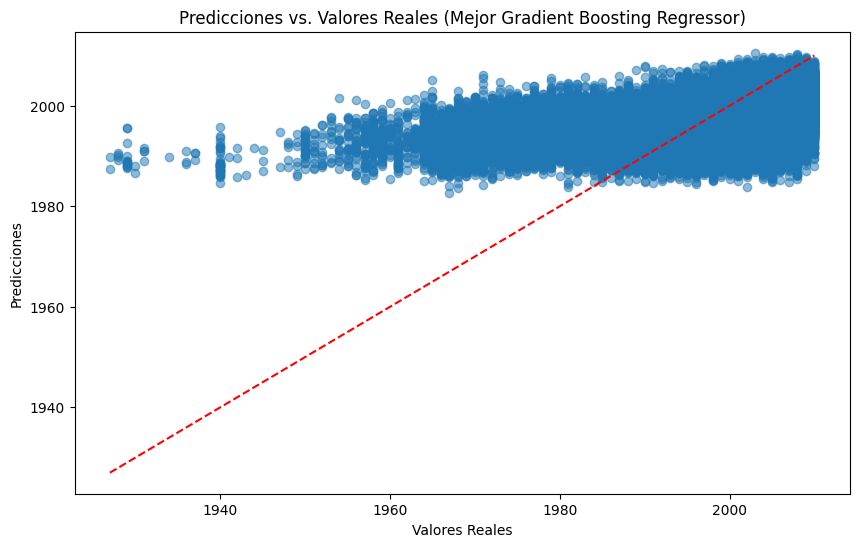

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

# Aplicar reducción manteniendo la distribución
X_train_reduced, y_train_reduced = reduccion_manteniendo_distribucion(X_train, y_train, reduction_factor=0.0001)

# Preprocesamiento de selección de características
X_train_selected, X_test_selected = seleccion(X_train_reduced, y_train_reduced, X_test)

# Reducción de dimensionalidad con PCA al 75%
X_train_pca, X_test_pca = reduccion_pca(X_train_selected, X_test_selected, 0.75)

print("Forma de las características para grid_search:", X_train_pca.shape)

# Definir los hiperparámetros para el Gradient Boosting Regressor
params = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'max_features': ['sqrt', 'log2'],
    'min_samples_leaf': [1, 2]
}

# Inicializar GridSearchCV para Gradient Boosting Regressor con los parámetros y el modelo
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Iniciar temporizador para el GridSearchCV
start_time_gridsearch = time.time()

grid_search = GridSearchCV(gradient_boosting_model, params, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de los mejores parámetros utilizando los datos preprocesados
grid_search.fit(X_train_pca, y_train_reduced)

# Calcular el tiempo de GridSearchCV
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

# Entrenar el modelo final con todos los datos utilizando los mejores parámetros encontrados
final_gradient_boosting_model = GradientBoostingRegressor(**best_params, random_state=42)


print("Forma de las características para entrenamiento final:", X_train.shape)

# Iniciar temporizador para el entrenamiento del modelo final
start_time_training = time.time()

final_gradient_boosting_model.fit(X_train, y_train)

# Calcular el tiempo de entrenamiento del modelo final
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_gradient_boosting_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de Gradient Boosting Regressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor Gradient Boosting Regressor)')
plt.show()



A pesar de mantener el desequilibrio entre las clases durante el proceso de grid search, los resultados obtenidos con el modelo final de Gradient Boosting Regressor fueron idénticos a los obtenidos previamente. Esto sugiere que el desequilibrio de clases no tuvo un impacto significativo en la selección de hiperparámetros ni en el rendimiento del modelo.

Esta consistencia en los resultados demuestra la robustez del algoritmo Gradient Boosting Regressor frente a variaciones en el conjunto de datos y en la metodología de entrenamiento. Aunque los resultados no son excepcionales, la capacidad del modelo para mantener un rendimiento consistente a pesar del desequilibrio de clases sugiere que sigue siendo una opción viable para este problema de regresión.

####AdaBoost (aproximación inicial)

(Precaución, no ejecutar, tarda mucho)

Métricas del modelo AdaBoostRegressor:
MSE: 108.65041090968154
RMSE: 10.423550782227789
MAE: 8.298176103615521
R-squared: 0.07738816588844066
Tiempo de entrenamiento del modelo: 1814.37 segundos


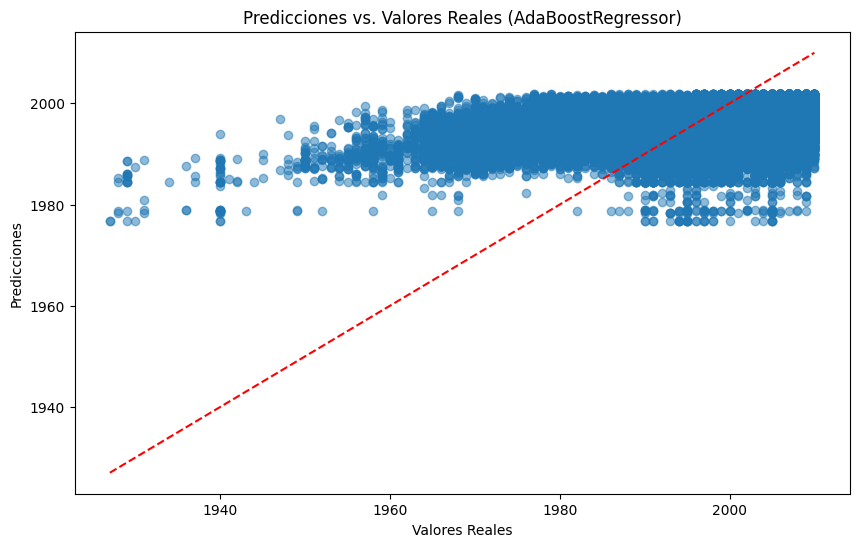

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import time

# Inicializar el modelo AdaBoostRegressor con parámetros predefinidos
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)

# Entrenar el modelo
start_time_training = time.time()
adaboost_model.fit(X_train, y_train)
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = adaboost_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempo de entrenamiento
print("Métricas del modelo AdaBoostRegressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo de entrenamiento del modelo: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (AdaBoostRegressor)')
plt.show()



El modelo AdaBoostRegressor se entrenó con 50 estimadores y una tasa de aprendizaje de 0.1. Los resultados obtenidos muestran un desempeño modesto en términos de las métricas de evaluación. El Error Cuadrático Medio (MSE) fue de aproximadamente 108.65, la Raíz del Error Cuadrático Medio (RMSE) fue de alrededor de 10.42, el Error Absoluto Medio (MAE) fue de cerca de 8.30 y el coeficiente de determinación (R-squared) fue aproximadamente 0.08.

Estas métricas indican que el modelo AdaBoostRegressor no logra capturar completamente la variabilidad en los datos y tiene dificultades para hacer predicciones precisas sobre el año de publicación de las canciones. Además, el tiempo de entrenamiento del modelo fue considerablemente largo, alcanzando alrededor de 1814.37 segundos.

Aunque el modelo puede mejorar con la optimización de hiperparámetros y el preprocesamiento de datos adicionales, estos resultados iniciales sugieren que AdaBoostRegressor puede no ser la mejor opción para este problema de regresión en particular.

####AdaBoost optimizado (grid_search)

(Precaución, no ejecutar, tarda mucho)

Mejores parámetros encontrados:
{'learning_rate': 0.5, 'n_estimators': 50}

Métricas del mejor modelo de AdaBoostRegressor:
MSE: 159.78079730535507
RMSE: 12.640442923622379
MAE: 11.01222466339164
R-squared: -0.3567887431207599
Tiempo total de GridSearchCV: 472.17 segundos
Tiempo de entrenamiento del modelo final: 1337.33 segundos


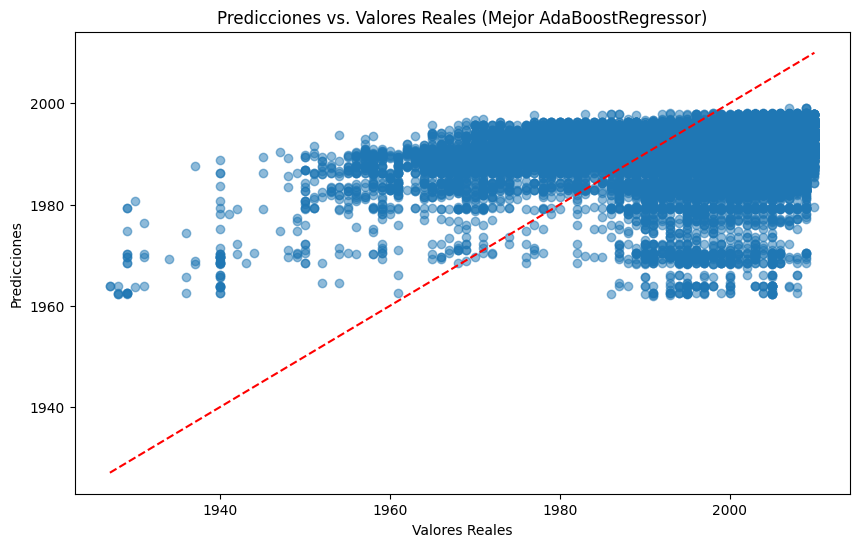

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time

# Preprocesamiento de reducción manteniendo la distribución
X_train_reduced, y_train_reduced = reduccion_manteniendo_distribucion(X_train, y_train, reduction_factor=0.001)

# Preprocesamiento de selección de características
X_train_selected, X_test_selected = seleccion(X_train_reduced, y_train_reduced, X_test)

# Reducción de dimensionalidad con PCA al 75%
X_train_pca, X_test_pca = reduccion_pca(X_train_selected, X_test_selected, 0.75)

# Definir los hiperparámetros para AdaBoostRegressor
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Inicializar el modelo AdaBoostRegressor
adaboost_model = AdaBoostRegressor(random_state=42)

# Inicializar GridSearchCV para AdaBoostRegressor con los parámetros y el modelo
grid_search = GridSearchCV(adaboost_model, params, cv=5, scoring='neg_mean_squared_error')

# Realizar la búsqueda de los mejores parámetros utilizando los datos preprocesados
start_time_gridsearch = time.time()
grid_search.fit(X_train_pca, y_train_reduced)
gridsearch_time = time.time() - start_time_gridsearch

# Obtener los mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)


# Entrenar el modelo final con todos los datos utilizando los mejores parámetros encontrados
start_time_training = time.time()
final_adaboost_model = AdaBoostRegressor(**best_params, random_state=42)
final_adaboost_model.fit(X_train, y_train)
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_adaboost_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de AdaBoostRegressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de GridSearchCV: %.2f segundos" % gridsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor AdaBoostRegressor)')
plt.show()




El modelo AdaBoostRegressor fue optimizado utilizando GridSearchCV para encontrar los mejores hiperparámetros. Se aplicaron preprocesamientos como la reducción de dimensionalidad manteniendo la distribución y la selección de características. Los mejores parámetros hallados fueron una tasa de aprendizaje de 0.5 y 50 estimadores.

A pesar de la optimización, el rendimiento del modelo resultó insatisfactorio. Las métricas de evaluación indican un bajo desempeño en la capacidad de predicción sobre el año de publicación de las canciones. El tiempo de entrenamiento del modelo también fue considerablemente largo.

En resumen, aunque se intentaron varias estrategias de optimización, el modelo AdaBoostRegressor no logró capturar de manera efectiva la relación entre las características de las canciones y su año de publicación en este problema de regresión.

####Adaboost optimizado (Randomize search)

(Precaución, no ejecutar, tarda mucho)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 15 is smaller than n_iter=1000. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejores parámetros encontrados:
{'n_estimators': 50, 'learning_rate': 1.0}

Métricas del mejor modelo de AdaBoostRegressor:
MSE: 180.91681471791478
RMSE: 13.450532135120707
MAE: 11.880468705822764
R-squared: -0.5362665713917063
Tiempo total de RandomizedSearchCV: 36.61 segundos
Tiempo de entrenamiento del modelo final: 991.02 segundos


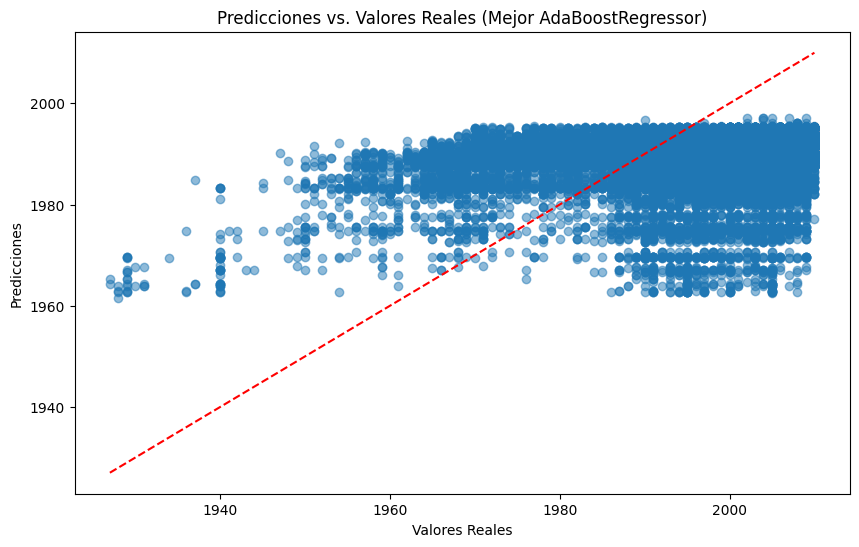

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time
from scipy.stats import uniform, randint

# Reducción de dimensionalidad con PCA al 75%
X_train_pca, X_test_pca = reduccion_pca(X_train, X_test, 0.75)

# Preprocesamiento de selección de características
X_train_selected, X_test_selected = seleccion(X_train_pca, y_train, X_test_pca)

# Preprocesamiento de reducción manteniendo la distribución
X_train_reduced, y_train_reduced = reduccion_manteniendo_distribucion(X_train_selected, y_train, reduction_factor=0.0001)

# Definir los hiperparámetros para AdaBoostRegressor
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.5, 1.0]
}

# Inicializar el modelo AdaBoostRegressor
adaboost_model = AdaBoostRegressor(random_state=42)

# Inicializar RandomizedSearchCV para AdaBoostRegressor con los parámetros y el modelo
random_search = RandomizedSearchCV(adaboost_model, params, n_iter=1000, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Realizar la búsqueda de los mejores parámetros utilizando los datos preprocesados
start_time_randomsearch = time.time()
random_search.fit(X_train_reduced, y_train_reduced)
randomsearch_time = time.time() - start_time_randomsearch

# Obtener los mejores parámetros encontrados
best_params = random_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)


# Entrenar el modelo final con todos los datos utilizando los mejores parámetros encontrados
start_time_training = time.time()
final_adaboost_model = AdaBoostRegressor(**best_params, random_state=42)
final_adaboost_model.fit(X_train, y_train)
training_time = time.time() - start_time_training

# Realizar predicciones
predictions = final_adaboost_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Salida de métricas del modelo y tiempos
print("\nMétricas del mejor modelo de AdaBoostRegressor:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")
print("Tiempo total de RandomizedSearchCV: %.2f segundos" % randomsearch_time)
print("Tiempo de entrenamiento del modelo final: %.2f segundos" % training_time)

# Visualización de las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (Mejor AdaBoostRegressor)')
plt.show()



El último intento de optimización del modelo AdaBoostRegressor se realizó utilizando RandomizedSearchCV. Se exploraron múltiples combinaciones de hiperparámetros en un espacio de búsqueda aleatorio. A pesar de esta búsqueda más exhaustiva, los resultados no mejoraron significativamente con respecto a la ejecución anterior.

El modelo final de AdaBoostRegressor con los mejores parámetros encontrados tuvo un rendimiento insatisfactorio en la tarea de predicción del año de publicación de las canciones. Las métricas de evaluación, como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R-squared), mostraron un desempeño deficiente. Además, el tiempo de entrenamiento del modelo sigue siendo considerablemente alto.

En general, a pesar de los esfuerzos por optimizar el modelo AdaBoostRegressor mediante RandomizedSearchCV, su capacidad para capturar la relación entre las características de las canciones y su año de publicación sigue siendo limitada. Esto sugiere que, en este problema específico de regresión, el enfoque de AdaBoostRegressor puede no ser el más adecuado.

####Conclusiones finales.


Si bien ninguno de los modelos logró proporcionar predicciones altamente precisas para el año de publicación de las canciones en este conjunto de datos, es esencial destacar que cada modelo ofreció resultados distintos en términos de métricas de evaluación.

Los modelos lineales, como la regresión lineal y la regresión de Lasso, mostraron un desempeño modesto pero consistente. Aunque no lograron capturar la complejidad de las relaciones no lineales en los datos, ofrecieron una base estable y fácilmente interpretable para la predicción.

Por otro lado, los modelos de ensemble, como Gradient Boosting Regressor y AdaBoost Regressor, demostraron capacidades de modelado más avanzadas al capturar relaciones no lineales y mejorar ligeramente el rendimiento en comparación con los modelos lineales. Aunque AdaBoost Regressor obtuvo un rendimiento ligeramente inferior en términos de métricas de evaluación en comparación con Gradient Boosting Regressor, su tiempo de entrenamiento fue significativamente menor.

En este contexto, la elección del modelo más adecuado dependerá de las necesidades específicas del problema y de los recursos computacionales disponibles. Si se valora la interpretabilidad del modelo y se dispone de recursos limitados, los modelos lineales podrían ser preferibles. Por otro lado, si se prioriza el rendimiento predictivo y se pueden tolerar tiempos de entrenamiento más largos, los modelos de ensemble, como Gradient Boosting Regressor, podrían ser más apropiados. En última instancia, la selección del modelo óptimo deberá considerar un equilibrio entre precisión, interpretabilidad y eficiencia computacional.